# 6주차 주간 시험 - 추가 과제물

### 참고 
- Naver의 Open API를 활용하면서 호출 제한 사항을 고려하여, 해당 과제 주제 맞는 프로그래밍 언어별 수집 요청은 10회로 한정하여 진행
    - ex) Python 검색어 -> 1회 100개 서적 검색 시도 -> 전체 10회
- TIOBE 인기 있는 프로그래밍 언어 TOP 20에서 한국 서적이 검색되지 않는 프로그래밍 언어는 제외 되어 있습니다.

In [2]:
# 네이버 검색 API예제는 블로그를 비롯 전문자료까지 호출방법이 동일하므로 blog검색만 대표로 예제를 올렸습니다.
# 네이버 검색 Open API 예제 - 블로그 검색
import os
import ssl
import sys
import urllib.request
import json
import pandas as pd
import numpy as np
import platform

from tqdm import tqdm
from time import sleep
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as bs
from fake_useragent import UserAgent
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [3]:
pd.options.mode.chained_assignment = None

#### 시각화 한글 설정

In [4]:
path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Set Hangul of Darwin")
    rc("font", family="Arial Unicode MS")
    
elif platform.system() == "Windows":
    print("Set Hangul of Windows")
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
    
else:
    print("Unknown system. Error Hangul")
    
plt.rcParams["axes.unicode_minus"] = False

Set Hangul of Windows


#### 클라이언트 정보

In [5]:
client_id = "tYZU6L0DOk2rmPWDjnDK"
client_secret = "aw0kxfUYO1"

#### 네이버 API 정보

In [6]:
def gen_search_url(api_node, search_text, catg, start_num, disp_num, d_dafr):
    '''
    # 내용 : 네이버 검색 API 주소 생성 함수
    # 리턴 : 주소
    # 
    '''
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?d_titl=" + urllib.parse.quote(search_text) # 검색할 단어
    param_catg = "&d_catg=" + catg # 서적 카테고리
    param_start = "&start=" + str(start_num) # 시작 페이지
    param_disp = "&display=" + str(disp_num) # 데이터 row 수
    param_d_dafr = "&d_dafr=" + d_dafr # 출간 시작일(yyyymmdd)
    
    return base + node + param_query + param_catg + param_start + param_disp + param_d_dafr 

In [7]:
def get_result_onpage(url):
    '''
    # 내용 : 네이버 검색 API 요청 함수
    # 리턴 : 결과
    '''
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    print(response.status, end=", ")
    
    return json.loads(response.read().decode("utf-8"))

In [8]:
def delete_tag(input_str):
    '''
    # 내용 : HTML b Tag를 삭제
    # 리턴 : 삭제된 문자열
    '''
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    return input_str

In [13]:
def get_tiobe_rank():
    '''
    # 내용 : TIOBE 페이지의 언어별 Rank 테이블 검색
    # 리턴 : TIOBE RANK 테이블 정보(DataFrame)
    '''
    url = "https://www.tiobe.com/tiobe-index"
    ua = UserAgent()
    context = ssl._create_unverified_context()
    headers = {"User-Agent":ua.ie}
    
    req = Request(url, headers=headers)
    response = urlopen(req, context=context)
    
    soup = bs(response, "html.parser")
    
    table = soup.find("table", id="top20")
    df = pd.read_html(str(table))
    return df[0]

In [14]:
# TIOBE 랭킹 데이터 선언
df_tiobe = get_tiobe_rank()

In [15]:
# Delphi/Object Pascal 검색에서 불리하므로 Object Pascal로 편경
df_tiobe.loc[df_tiobe["Programming Language.1"]=="Delphi/Object Pascal", "Programming Language.1"] = "Object Pascal"

In [16]:
df_tiobe

,Oct 2021,Oct 2020,Change,Programming Language,Programming Language.1,Ratings,Change.1
0,1,3,NaN,NaN,Python,11.27%,-0.00%
1,2,1,NaN,NaN,C,11.16%,-5.79%
2,3,2,NaN,NaN,Java,10.46%,-2.11%
3,4,4,NaN,NaN,C++,7.50%,+0.57%
4,5,5,NaN,NaN,C#,5.26%,+1.10%
5,6,6,NaN,NaN,Visual Basic,5.24%,+1.27%
6,7,7,NaN,NaN,JavaScript,2.19%,+0.05%
7,8,10,NaN,NaN,SQL,2.17%,+0.61%
8,9,8,NaN,NaN,PHP,2.10%,+0.01%
9,10,17,NaN,NaN,Assembly language,2.06%,+0.99%


### Naver API 검색
- 검색어 : [프로그래밍 언어이름] 언어 -> ex) Python 언어
- 차후 중복 검색은 isbn 으로 drop_duplicate()

In [16]:
data = []


for idx, rows in tqdm(df_tiobe.iterrows()):
    # 프로그래밍 언어 이름 선언
    lang = rows["Programming Language.1"]
    rank = rows["Oct 2021"]
    print(f"{rank}위, 검색어 : {lang} 프로그래밍")

    # API URL 선언 
    # 검색어 : [언어이름] 프로그래밍
    for num in range(1, 1000, 100): # 언어별로 1000개씩 조회하여 리서치

        # API 상세 검색 URL 생성
        url = gen_search_url("book_adv", f"{lang} 프로그래밍", "it", num, 100, "20170101")

        # API Request
        results = get_result_onpage(url)
        items = results["items"]

        # Row별 언어 이름 추가
        for it in items:
            it["language"] = lang
            it["rank"] = rank

            # 출간일 정보의 양식이 YYYYMMDD로 일치하지 않으면 수집 X
            if len(it["pubdate"]) < 5:
                continue

            data.append(it)

        sleep(0.5)

0it [00:00, ?it/s]

1위, 검색어 : Python 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

1it [00:06,  6.27s/it]

2위, 검색어 : C 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

2it [00:14,  7.58s/it]

3위, 검색어 : Java 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

3it [00:21,  7.17s/it]

4위, 검색어 : C++ 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

4it [00:28,  7.13s/it]

5위, 검색어 : C# 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

5it [00:35,  6.93s/it]

6위, 검색어 : Visual Basic 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

6it [00:41,  6.73s/it]

7위, 검색어 : JavaScript 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

7it [00:47,  6.65s/it]

8위, 검색어 : SQL 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

8it [00:54,  6.59s/it]

9위, 검색어 : PHP 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

9it [01:00,  6.55s/it]

10위, 검색어 : Assembly language 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

10it [01:07,  6.45s/it]

11위, 검색어 : Classic Visual Basic 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

11it [01:13,  6.37s/it]

12위, 검색어 : Go 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

12it [01:19,  6.35s/it]

13위, 검색어 : MATLAB 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

13it [01:25,  6.29s/it]

14위, 검색어 : R 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

14it [01:32,  6.30s/it]

15위, 검색어 : Groovy 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

15it [01:38,  6.26s/it]

16위, 검색어 : Ruby 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

16it [01:44,  6.27s/it]

17위, 검색어 : Swift 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

17it [01:50,  6.27s/it]

18위, 검색어 : Fortran 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

18it [01:57,  6.28s/it]

19위, 검색어 : Perl 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

19it [02:03,  6.27s/it]

20위, 검색어 : Object Pascal 프로그래밍
200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 

20it [02:09,  6.48s/it]


In [62]:
df = pd.DataFrame(data)

In [63]:
df["title"] = df["title"].apply(delete_tag)
df["price"] = df["price"].apply(pd.to_numeric, errors = 'coerce')

In [64]:
df.drop_duplicates("isbn", keep="last", inplace=True)

In [65]:
df.tail(3)

,title,link,image,author,price,discount,publisher,pubdate,isbn,description,language,rank
1863,PERL 5 웹 프로그래밍 활용,http://book.naver.com/bookdb/book_detail.php?b...,,Harlan,18000.0,,정보문화사,19970506,5806002950 2005806002959,웹서버를 구축하려는 프로그래머를 위한 활용서. 향후 웹의 핵심이 될 데이터베...,Perl,19
1864,PERL 5로 배우는 CGI 프로그래밍,http://book.naver.com/bookdb/book_detail.php?b...,,ERIC HERRMANN,15000.0,,인포북,19961015,550700160X 2005507001602,,Perl,19
1865,PERL:WEB PROGRAMMING PROFESSIONAL(웹프로그래밍시리즈),http://book.naver.com/bookdb/book_detail.php?b...,,김응석,15000.0,,정보문화사,20010209,8976277945 9788976277947,,Perl,19


In [66]:
df["page_num"] = np.nan

In [68]:
for idx, rows in tqdm(df.iterrows()):
    # 책 주소
    link = rows["link"]
    
    # 랜덤 헤더값
    ua = UserAgent()
    context = ssl._create_unverified_context()
    headers = {"User-Agent":ua.ie}
    
    # 네이버 책 검색
    req = Request(link, headers=headers)
    response = urlopen(req, context=context)
    soup = bs(response, "html.parser")
    
    # HTML 파싱
    book_info = soup.find("div", class_="book_info")
    book_info_inner = book_info.find("div", class_="book_info_inner")
    div_list = book_info_inner.find_all("div")
    
    # 페이지 수량 찾기
    page_num = np.nan
    for div in div_list:
        if "페이지" in div.text:
            page_num = div.text.split("|")[0].split(" ")[1].strip()
            
    df.loc[df.index == idx, "page_num"] = page_num
    print(dict(df.loc[df.index == idx, "page_num"]), end=", ")

1it [00:00,  2.90it/s]

{0: '431'}, 

2it [00:00,  3.10it/s]

{1: '444'}, 

3it [00:00,  3.10it/s]

{2: '350'}, 

4it [00:01,  3.30it/s]

{3: '328'}, 

5it [00:01,  3.24it/s]

{4: '432'}, 

6it [00:01,  3.40it/s]

{5: '363'}, 

7it [00:02,  3.39it/s]

{6: '520'}, 

8it [00:02,  3.62it/s]

{7: '830'}, 

9it [00:02,  3.65it/s]

{8: '248'}, 

10it [00:02,  3.53it/s]

{9: '526'}, 

11it [00:03,  3.23it/s]

{10: '398'}, 

12it [00:03,  3.24it/s]

{11: '246'}, 

13it [00:03,  3.29it/s]

{12: '186'}, 

14it [00:04,  3.33it/s]

{13: '320'}, 

15it [00:04,  3.44it/s]

{14: '308'}, 

16it [00:04,  3.39it/s]

{15: '964'}, 

17it [00:05,  3.47it/s]

{16: '348'}, 

18it [00:05,  3.56it/s]

{17: '78'}, 

19it [00:05,  3.48it/s]

{18: '184'}, 

20it [00:05,  3.64it/s]

{19: '388'}, 

21it [00:06,  3.83it/s]

{20: '236'}, 

22it [00:06,  3.86it/s]

{21: '423'}, 

23it [00:06,  3.34it/s]

{22: '606'}, 

24it [00:07,  2.97it/s]

{23: '616'}, 

25it [00:07,  3.05it/s]

{26: '780'}, 

26it [00:07,  2.99it/s]

{27: '444'}, 

27it [00:08,  3.15it/s]

{29: '406'}, 

28it [00:08,  3.24it/s]

{30: '372'}, 

29it [00:08,  3.30it/s]

{31: '424'}, 

30it [00:08,  3.31it/s]

{33: '474'}, 

31it [00:09,  3.39it/s]

{34: '643'}, 

32it [00:09,  3.38it/s]

{36: '578'}, 

33it [00:09,  3.33it/s]

{37: '604'}, 

34it [00:10,  3.28it/s]

{40: '664'}, 

35it [00:10,  3.35it/s]

{42: '708'}, 

36it [00:10,  3.29it/s]

{44: '580'}, 

37it [00:11,  3.42it/s]

{46: '652'}, 

38it [00:11,  3.64it/s]

{47: nan}, 

39it [00:11,  3.50it/s]

{48: '249'}, 

40it [00:11,  3.55it/s]

{50: '321'}, 

41it [00:12,  3.54it/s]

{52: '591'}, 

42it [00:12,  3.50it/s]

{54: '532'}, 

43it [00:12,  3.38it/s]

{55: '552'}, 

44it [00:13,  3.49it/s]

{56: '416'}, 

45it [00:13,  3.65it/s]

{58: '390'}, 

46it [00:13,  3.02it/s]

{60: '668'}, 

47it [00:13,  3.22it/s]

{61: '462'}, 

48it [00:14,  3.37it/s]

{62: '406'}, 

49it [00:14,  3.28it/s]

{63: '404'}, 

50it [00:14,  3.12it/s]

{64: '684'}, 

51it [00:15,  3.23it/s]

{66: '224'}, 

52it [00:15,  3.33it/s]

{67: '238'}, 

53it [00:15,  3.42it/s]

{68: '415'}, 

54it [00:16,  3.55it/s]

{69: '685'}, 

55it [00:16,  3.52it/s]

{71: '808'}, 

56it [00:16,  3.50it/s]

{74: '487'}, 

57it [00:16,  3.60it/s]

{77: '266'}, 

58it [00:17,  3.53it/s]

{79: '588'}, 

59it [00:17,  3.58it/s]

{81: '518'}, 

60it [00:17,  3.56it/s]

{82: '664'}, 

61it [00:18,  3.32it/s]

{84: '352'}, 

62it [00:18,  3.47it/s]

{85: '448'}, 

63it [00:18,  3.54it/s]

{86: '315'}, 

64it [00:19,  2.51it/s]

{90: '325'}, 

65it [00:19,  2.76it/s]

{91: '604'}, 

66it [00:19,  2.84it/s]

{94: '492'}, 

67it [00:20,  2.98it/s]

{95: '248'}, 

68it [00:20,  3.10it/s]

{96: '413'}, 

69it [00:20,  2.63it/s]

{97: '368'}, 

70it [00:21,  2.80it/s]

{98: '564'}, 

71it [00:21,  2.88it/s]

{100: '471'}, 

72it [00:21,  3.04it/s]

{102: '656'}, 

73it [00:22,  3.06it/s]

{103: '536'}, 

74it [00:22,  3.26it/s]

{104: '320'}, 

75it [00:22,  3.30it/s]

{105: '545'}, 

76it [00:22,  3.59it/s]

{106: '191'}, 

77it [00:23,  3.70it/s]

{108: '520'}, 

78it [00:23,  3.59it/s]

{109: '179'}, 

79it [00:23,  3.75it/s]

{110: '356'}, 

80it [00:24,  3.47it/s]

{111: '380'}, 

81it [00:24,  3.61it/s]

{116: '321'}, 

82it [00:24,  3.41it/s]

{117: '731'}, 

83it [00:24,  3.47it/s]

{119: '526'}, 

84it [00:25,  3.36it/s]

{120: '384'}, 

85it [00:25,  3.31it/s]

{121: '504'}, 

86it [00:25,  3.36it/s]

{122: '659'}, 

87it [00:26,  3.31it/s]

{127: '632'}, 

88it [00:26,  3.47it/s]

{128: '522'}, 

89it [00:26,  3.23it/s]

{130: '224'}, 

90it [00:27,  3.38it/s]

{131: '390'}, 

91it [00:27,  3.53it/s]

{132: '567'}, 

92it [00:27,  3.31it/s]

{134: '643'}, 

93it [00:28,  3.21it/s]

{135: '398'}, 

94it [00:28,  3.31it/s]

{136: '396'}, 

95it [00:28,  3.46it/s]

{137: '450'}, 

96it [00:29,  2.70it/s]

{140: '442'}, 

97it [00:29,  2.91it/s]

{141: '472'}, 

98it [00:29,  3.27it/s]

{142: '311'}, 

99it [00:29,  3.31it/s]

{143: '612'}, 

100it [00:30,  3.40it/s]

{144: '304'}, 

101it [00:31,  2.02it/s]

{145: '616'}, 

102it [00:31,  2.36it/s]

{147: '297'}, 

103it [00:31,  2.70it/s]

{148: '618'}, 

104it [00:31,  2.94it/s]

{151: '544'}, 

105it [00:32,  3.03it/s]

{152: '280'}, 

106it [00:32,  3.07it/s]

{153: '454'}, 

107it [00:32,  3.33it/s]

{154: '324'}, 

108it [00:33,  3.30it/s]

{156: '782'}, 

109it [00:33,  3.38it/s]

{158: '212'}, 

110it [00:33,  3.36it/s]

{160: '748'}, 

111it [00:33,  3.53it/s]

{164: '182'}, 

112it [00:34,  3.35it/s]

{165: '364'}, 

113it [00:34,  3.48it/s]

{166: '598'}, 

114it [00:34,  3.42it/s]

{167: '649'}, 

115it [00:35,  3.54it/s]

{168: '438'}, 

116it [00:35,  3.56it/s]

{171: '310'}, 

117it [00:35,  3.60it/s]

{173: '384'}, 

118it [00:35,  3.59it/s]

{174: '240'}, 

119it [00:36,  2.95it/s]

{175: '520'}, 

120it [00:36,  3.16it/s]

{178: '448'}, 

121it [00:37,  2.51it/s]

{180: '566'}, 

122it [00:37,  2.79it/s]

{181: '298'}, 

123it [00:37,  2.88it/s]

{182: '512'}, 

124it [00:38,  3.04it/s]

{186: '568'}, 

125it [00:38,  3.24it/s]

{187: '560'}, 

126it [00:38,  3.18it/s]

{188: '400'}, 

127it [00:38,  3.34it/s]

{194: '546'}, 

128it [00:39,  3.30it/s]

{197: '564'}, 

129it [00:39,  3.46it/s]

{199: '316'}, 

130it [00:39,  3.43it/s]

{200: '834'}, 

131it [00:40,  3.46it/s]

{201: '271'}, 

132it [00:40,  3.62it/s]

{202: '283'}, 

133it [00:40,  3.56it/s]

{203: '222'}, 

134it [00:40,  3.34it/s]

{204: '356'}, 

135it [00:41,  3.27it/s]

{205: '404'}, 

136it [00:41,  3.23it/s]

{206: '433'}, 

137it [00:41,  3.15it/s]

{208: '730'}, 

138it [00:42,  3.38it/s]

{210: '585'}, 

139it [00:42,  3.30it/s]

{211: '525'}, 

140it [00:42,  3.00it/s]

{212: '624'}, 

141it [00:43,  3.11it/s]

{213: '376'}, 

142it [00:43,  2.86it/s]

{214: '627'}, 

143it [00:43,  2.88it/s]

{215: '336'}, 

144it [00:44,  3.02it/s]

{216: '495'}, 

145it [00:44,  3.03it/s]

{217: '394'}, 

146it [00:44,  3.11it/s]

{218: '552'}, 

147it [00:45,  3.20it/s]

{219: '336'}, 

148it [00:45,  3.24it/s]

{222: '407'}, 

149it [00:45,  3.26it/s]

{224: '656'}, 

150it [00:46,  3.49it/s]

{226: '268'}, 

151it [00:46,  3.50it/s]

{227: '566'}, 

152it [00:46,  3.26it/s]

{228: '431'}, 

153it [00:46,  3.43it/s]

{229: '593'}, 

154it [00:47,  3.52it/s]

{230: '404'}, 

155it [00:47,  3.56it/s]

{232: '367'}, 

156it [00:47,  3.56it/s]

{234: '435'}, 

157it [00:48,  3.60it/s]

{235: '384'}, 

158it [00:48,  3.64it/s]

{238: '700'}, 

159it [00:48,  3.73it/s]

{243: '556'}, 

160it [00:48,  3.88it/s]

{244: '584'}, 

161it [00:49,  3.97it/s]

{245: '316'}, 

162it [00:49,  3.90it/s]

{246: '312'}, 

163it [00:49,  3.87it/s]

{247: '325'}, 

164it [00:49,  3.75it/s]

{250: '664'}, 

165it [00:50,  3.55it/s]

{252: '790'}, 

166it [00:50,  3.38it/s]

{253: '1996'}, 

167it [00:50,  2.79it/s]

{256: '1948'}, 

168it [00:51,  2.93it/s]

{258: '218'}, 

169it [00:51,  3.12it/s]

{259: '318'}, 

170it [00:51,  3.35it/s]

{261: '338'}, 

171it [00:52,  3.16it/s]

{262: '403'}, 

172it [00:52,  3.26it/s]

{263: '392'}, 

173it [00:52,  3.51it/s]

{264: '403'}, 

174it [00:53,  3.39it/s]

{265: '242'}, 

175it [00:53,  3.52it/s]

{266: '168'}, 

176it [00:53,  3.25it/s]

{267: '360'}, 

177it [00:53,  3.44it/s]

{269: '403'}, 

178it [00:54,  3.40it/s]

{270: '637'}, 

179it [00:54,  3.49it/s]

{272: '256'}, 

180it [00:54,  3.64it/s]

{273: '345'}, 

181it [00:54,  3.57it/s]

{274: '639'}, 

182it [00:55,  3.62it/s]

{275: '376'}, 

183it [00:56,  2.12it/s]

{276: '328'}, 

184it [00:56,  2.45it/s]

{277: '389'}, 

185it [00:56,  2.85it/s]

{278: '502'}, 

186it [00:56,  2.89it/s]

{279: '285'}, 

187it [00:57,  3.12it/s]

{281: '494'}, 

188it [00:57,  3.28it/s]

{282: '510'}, 

189it [00:57,  3.12it/s]

{283: '204'}, 

190it [00:58,  3.15it/s]

{284: '348'}, 

191it [00:58,  3.22it/s]

{285: '415'}, 

192it [00:58,  3.17it/s]

{287: '344'}, 

193it [00:59,  3.06it/s]

{289: '320'}, 

194it [00:59,  3.17it/s]

{290: '446'}, 

195it [00:59,  2.74it/s]

{294: '1172'}, 

196it [01:00,  2.98it/s]

{295: '550'}, 

197it [01:00,  3.18it/s]

{296: '546'}, 

199it [01:00,  3.63it/s]

{297: '606'}, {298: '312'}, 

200it [01:01,  3.63it/s]

{299: '404'}, 

201it [01:01,  3.74it/s]

{300: '320'}, 

202it [01:01,  3.62it/s]

{302: '360'}, 

203it [01:02,  3.36it/s]

{303: '368'}, 

204it [01:02,  3.43it/s]

{304: '544'}, 

205it [01:02,  3.58it/s]

{307: '318'}, 

206it [01:02,  3.54it/s]

{308: '352'}, 

207it [01:03,  3.65it/s]

{312: '702'}, 

208it [01:03,  3.71it/s]

{314: '798'}, 

209it [01:03,  3.55it/s]

{315: '548'}, 

210it [01:04,  3.46it/s]

{317: '428'}, 

211it [01:04,  3.56it/s]

{318: '531'}, 

212it [01:04,  3.60it/s]

{320: '526'}, 

213it [01:04,  3.48it/s]

{321: '496'}, 

214it [01:05,  3.56it/s]

{324: '741'}, 

215it [01:05,  3.41it/s]

{325: '222'}, 

216it [01:05,  3.48it/s]

{326: '488'}, 

217it [01:06,  3.20it/s]

{328: '448'}, 

218it [01:06,  3.31it/s]

{329: '223'}, 

219it [01:06,  3.41it/s]

{330: '701'}, 

220it [01:06,  3.41it/s]

{331: '364'}, 

221it [01:07,  3.66it/s]

{332: '370'}, 

222it [01:07,  3.64it/s]

{333: '344'}, 

223it [01:07,  3.35it/s]

{335: '350'}, 

224it [01:08,  3.02it/s]

{337: '816'}, 

225it [01:08,  3.14it/s]

{338: '342'}, 

226it [01:08,  2.88it/s]

{340: '320'}, 

227it [01:09,  3.04it/s]

{341: '321'}, 

228it [01:10,  2.01it/s]

{342: '318'}, 

229it [01:10,  2.26it/s]

{345: '456'}, 

230it [01:10,  2.55it/s]

{346: '464'}, 

231it [01:11,  2.75it/s]

{347: '706'}, 

232it [01:11,  2.89it/s]

{348: '379'}, 

233it [01:11,  2.84it/s]

{351: '672'}, 

234it [01:12,  2.92it/s]

{352: '498'}, 

235it [01:12,  3.10it/s]

{354: '743'}, 

236it [01:12,  3.26it/s]

{355: '426'}, 

237it [01:12,  3.31it/s]

{358: '312'}, 

238it [01:13,  3.26it/s]

{359: '529'}, 

239it [01:13,  3.44it/s]

{360: '451'}, 

240it [01:13,  3.31it/s]

{366: '426'}, 

241it [01:14,  3.39it/s]

{367: '403'}, 

242it [01:14,  3.60it/s]

{368: '711'}, 

243it [01:14,  3.52it/s]

{370: '592'}, 

244it [01:14,  3.51it/s]

{372: '397'}, 

245it [01:15,  3.50it/s]

{374: '573'}, 

246it [01:15,  3.56it/s]

{376: '387'}, 

247it [01:15,  3.50it/s]

{377: '354'}, 

248it [01:16,  3.44it/s]

{378: '343'}, 

249it [01:16,  3.53it/s]

{384: '390'}, 

250it [01:16,  3.36it/s]

{385: '370'}, 

251it [01:16,  3.26it/s]

{387: '450'}, 

252it [01:17,  3.34it/s]

{388: '448'}, 

253it [01:17,  3.48it/s]

{389: '446'}, 

254it [01:18,  2.48it/s]

{396: '414'}, 

255it [01:18,  2.38it/s]

{397: '688'}, 

256it [01:18,  2.67it/s]

{398: nan}, 

257it [01:19,  2.92it/s]

{399: '428'}, 

258it [01:19,  3.23it/s]

{400: '292'}, 

259it [01:19,  3.22it/s]

{402: '412'}, 

260it [01:20,  3.18it/s]

{403: '576'}, 

261it [01:20,  3.50it/s]

{404: '253'}, 

262it [01:20,  3.51it/s]

{405: '567'}, 

263it [01:21,  2.48it/s]

{406: nan}, 

264it [01:21,  2.87it/s]

{407: '260'}, 

265it [01:21,  3.07it/s]

{408: '408'}, 

266it [01:22,  3.10it/s]

{410: '408'}, 

267it [01:22,  3.23it/s]

{412: '364'}, 

268it [01:22,  3.24it/s]

{414: '359'}, 

269it [01:22,  3.33it/s]

{415: '192'}, 

270it [01:23,  3.35it/s]

{417: '416'}, 

271it [01:23,  3.45it/s]

{418: '234'}, 

272it [01:23,  3.53it/s]

{420: '492'}, 

273it [01:24,  3.40it/s]

{421: '310'}, 

274it [01:24,  3.48it/s]

{423: '338'}, 

275it [01:24,  3.41it/s]

{425: '515'}, 

276it [01:24,  3.49it/s]

{426: '503'}, 

277it [01:25,  3.54it/s]

{430: '520'}, 

278it [01:25,  3.76it/s]

{431: '279'}, 

279it [01:26,  2.45it/s]

{435: '214'}, 

280it [01:26,  2.76it/s]

{439: '716'}, 

281it [01:26,  2.92it/s]

{442: '304'}, 

282it [01:26,  3.04it/s]

{444: '536'}, 

283it [01:27,  3.20it/s]

{445: '317'}, 

284it [01:27,  3.43it/s]

{446: '408'}, 

285it [01:27,  3.55it/s]

{450: '636'}, 

286it [01:28,  2.79it/s]

{451: '420'}, 

287it [01:28,  3.02it/s]

{452: '610'}, 

288it [01:28,  3.15it/s]

{453: '325'}, 

289it [01:29,  3.12it/s]

{454: '534'}, 

290it [01:29,  3.15it/s]

{455: '344'}, 

291it [01:29,  3.43it/s]

{456: '196'}, 

292it [01:30,  3.23it/s]

{457: '550'}, 

293it [01:30,  3.25it/s]

{458: '575'}, 

294it [01:31,  2.05it/s]

{459: '305'}, 

295it [01:31,  2.29it/s]

{462: '278'}, 

296it [01:31,  2.64it/s]

{463: '806'}, 

298it [01:32,  3.25it/s]

{466: '362'}, {467: '496'}, 

299it [01:33,  2.06it/s]

{468: '352'}, 

300it [01:33,  2.29it/s]

{470: '386'}, 

301it [01:33,  2.48it/s]

{471: '586'}, 

302it [01:34,  2.80it/s]

{472: '294'}, 

303it [01:34,  3.04it/s]

{473: '520'}, 

304it [01:34,  3.05it/s]

{477: '202'}, 

305it [01:34,  3.28it/s]

{478: '442'}, 

306it [01:35,  3.49it/s]

{479: '272'}, 

307it [01:35,  3.76it/s]

{482: '312'}, 

308it [01:35,  3.66it/s]

{483: '350'}, 

309it [01:35,  3.92it/s]

{484: '428'}, 

310it [01:36,  3.91it/s]

{485: '640'}, 

311it [01:36,  4.02it/s]

{486: '422'}, 

312it [01:36,  3.98it/s]

{487: '256'}, 

313it [01:36,  4.04it/s]

{489: '477'}, 

314it [01:37,  3.28it/s]

{490: '450'}, 

315it [01:37,  3.26it/s]

{491: '390'}, 

316it [01:37,  3.35it/s]

{492: '345'}, 

317it [01:38,  3.39it/s]

{494: '202'}, 

318it [01:38,  3.50it/s]

{495: '608'}, 

319it [01:38,  3.76it/s]

{496: '373'}, 

320it [01:38,  3.80it/s]

{497: '306'}, 

321it [01:39,  3.78it/s]

{498: '524'}, 

322it [01:39,  3.74it/s]

{499: '557'}, 

323it [01:39,  3.80it/s]

{500: '524'}, 

325it [01:40,  3.57it/s]

{502: '390'}, {503: '400'}, 

326it [01:40,  3.70it/s]

{504: '444'}, 

327it [01:40,  3.64it/s]

{507: '1036'}, 

328it [01:41,  3.88it/s]

{508: '436'}, 

329it [01:41,  3.89it/s]

{509: '526'}, 

330it [01:41,  3.94it/s]

{510: '407'}, 

331it [01:41,  3.86it/s]

{511: '460'}, 

332it [01:42,  3.67it/s]

{512: '338'}, 

333it [01:42,  3.57it/s]

{513: '408'}, 

334it [01:42,  3.58it/s]

{514: '440'}, 

335it [01:43,  3.77it/s]

{515: '342'}, 

336it [01:43,  3.79it/s]

{519: '674'}, 

337it [01:43,  3.96it/s]

{521: '419'}, 

338it [01:43,  4.01it/s]

{523: '286'}, 

339it [01:44,  3.79it/s]

{526: '430'}, 

340it [01:44,  3.56it/s]

{527: '553'}, 

341it [01:44,  3.61it/s]

{530: '414'}, 

342it [01:44,  3.58it/s]

{533: '436'}, 

343it [01:45,  3.52it/s]

{534: '1368'}, 

344it [01:45,  2.95it/s]

{536: '706'}, 

345it [01:45,  3.08it/s]

{537: '342'}, 

346it [01:46,  3.24it/s]

{538: '556'}, 

347it [01:46,  3.24it/s]

{539: '354'}, 

348it [01:46,  3.35it/s]

{540: '258'}, 

349it [01:47,  3.57it/s]

{541: '366'}, 

350it [01:47,  3.60it/s]

{542: '578'}, 

351it [01:47,  3.66it/s]

{543: '412'}, 

352it [01:47,  3.56it/s]

{544: '274'}, 

353it [01:48,  3.75it/s]

{545: '484'}, 

354it [01:48,  3.85it/s]

{547: '324'}, 

355it [01:48,  3.61it/s]

{548: '800'}, 

356it [01:49,  3.38it/s]

{549: '417'}, 

357it [01:49,  3.42it/s]

{550: '365'}, 

358it [01:49,  3.43it/s]

{552: '448'}, 

359it [01:49,  3.67it/s]

{554: '414'}, 

360it [01:50,  3.51it/s]

{557: '274'}, 

361it [01:50,  3.68it/s]

{558: '278'}, 

362it [01:50,  3.14it/s]

{560: '390'}, 

363it [01:51,  3.39it/s]

{561: '414'}, 

364it [01:51,  3.51it/s]

{562: '446'}, 

365it [01:51,  3.35it/s]

{563: '254'}, 

366it [01:51,  3.49it/s]

{565: '807'}, 

367it [01:52,  3.57it/s]

{566: '322'}, 

368it [01:52,  3.50it/s]

{567: '724'}, 

369it [01:52,  3.48it/s]

{569: '784'}, 

370it [01:52,  3.71it/s]

{576: '320'}, 

371it [01:53,  3.93it/s]

{577: '462'}, 

372it [01:53,  3.88it/s]

{579: '520'}, 

373it [01:53,  4.03it/s]

{582: '758'}, 

374it [01:53,  4.05it/s]

{584: '414'}, 

375it [01:54,  4.00it/s]

{585: '300'}, 

376it [01:54,  3.47it/s]

{586: '339'}, 

377it [01:54,  3.46it/s]

{587: '292'}, 

378it [01:55,  3.11it/s]

{589: '300'}, 

379it [01:56,  2.00it/s]

{590: '412'}, 

380it [01:56,  2.39it/s]

{591: '332'}, 

381it [01:56,  2.75it/s]

{592: '460'}, 

382it [01:56,  2.97it/s]

{593: '441'}, 

383it [01:57,  3.26it/s]

{594: '294'}, 

384it [01:57,  3.54it/s]

{595: '600'}, 

385it [01:57,  3.55it/s]

{597: '432'}, 

386it [01:57,  3.72it/s]

{601: '222'}, 

387it [01:58,  3.74it/s]

{603: '264'}, 

388it [01:58,  3.61it/s]

{606: '590'}, 

389it [01:58,  3.47it/s]

{608: '658'}, 

390it [01:59,  3.71it/s]

{610: '500'}, 

391it [01:59,  3.79it/s]

{611: '380'}, 

392it [01:59,  4.00it/s]

{613: '444'}, 

393it [01:59,  3.83it/s]

{615: '556'}, 

394it [02:00,  3.85it/s]

{617: '305'}, 

395it [02:00,  3.92it/s]

{622: '236'}, 

397it [02:00,  4.05it/s]

{624: '412'}, {625: '352'}, 

398it [02:01,  2.94it/s]

{626: '344'}, 

399it [02:01,  2.85it/s]

{628: '260'}, 

400it [02:01,  3.16it/s]

{629: '388'}, 

401it [02:02,  3.36it/s]

{630: '418'}, 

402it [02:02,  3.44it/s]

{632: '329'}, 

403it [02:02,  3.40it/s]

{634: '485'}, 

404it [02:03,  3.31it/s]

{636: '298'}, 

405it [02:03,  3.49it/s]

{637: '592'}, 

406it [02:03,  3.51it/s]

{638: '210'}, 

407it [02:03,  3.46it/s]

{639: '264'}, 

408it [02:04,  3.57it/s]

{641: '400'}, 

409it [02:04,  3.77it/s]

{642: '444'}, 

410it [02:04,  3.72it/s]

{643: '724'}, 

411it [02:05,  3.03it/s]

{644: '396'}, 

412it [02:05,  3.10it/s]

{648: '334'}, 

413it [02:05,  3.05it/s]

{649: '430'}, 

414it [02:06,  3.31it/s]

{650: '418'}, 

415it [02:06,  3.60it/s]

{651: '459'}, 

416it [02:06,  3.54it/s]

{652: '390'}, 

417it [02:06,  3.41it/s]

{655: '314'}, 

418it [02:07,  3.30it/s]

{656: '248'}, 

419it [02:07,  3.53it/s]

{658: '582'}, 

420it [02:07,  3.71it/s]

{659: '446'}, 

421it [02:07,  3.69it/s]

{660: '358'}, 

422it [02:08,  3.72it/s]

{661: '554'}, 

423it [02:08,  3.71it/s]

{662: '344'}, 

424it [02:09,  2.48it/s]

{663: '306'}, 

425it [02:09,  2.73it/s]

{664: '336'}, 

426it [02:10,  2.15it/s]

{665: '540'}, 

427it [02:10,  2.46it/s]

{666: '240'}, 

428it [02:10,  2.75it/s]

{670: '440'}, 

429it [02:10,  3.01it/s]

{672: '414'}, 

430it [02:11,  3.32it/s]

{673: '378'}, 

432it [02:11,  3.76it/s]

{675: '436'}, {676: '190'}, 

433it [02:11,  3.63it/s]

{677: '484'}, 

434it [02:12,  3.73it/s]

{678: '814'}, 

435it [02:12,  3.86it/s]

{679: '636'}, 

436it [02:12,  4.05it/s]

{680: '350'}, 

437it [02:12,  4.22it/s]

{683: '400'}, 

438it [02:13,  4.20it/s]

{685: '490'}, 

439it [02:13,  4.03it/s]

{688: '804'}, 

440it [02:13,  3.75it/s]

{690: '610'}, 

441it [02:13,  3.76it/s]

{691: '416'}, 

442it [02:14,  3.77it/s]

{692: '402'}, 

443it [02:14,  3.78it/s]

{694: '296'}, 

444it [02:14,  3.73it/s]

{695: '326'}, 

445it [02:15,  3.77it/s]

{696: '507'}, 

446it [02:15,  3.82it/s]

{697: '603'}, 

447it [02:15,  3.68it/s]

{698: '632'}, 

448it [02:15,  3.64it/s]

{700: '315'}, 

449it [02:16,  3.62it/s]

{701: '382'}, 

450it [02:16,  3.62it/s]

{702: '416'}, 

451it [02:16,  3.71it/s]

{703: '232'}, 

452it [02:17,  3.20it/s]

{704: '440'}, 

453it [02:17,  3.46it/s]

{705: '504'}, 

454it [02:17,  3.72it/s]

{708: '360'}, 

455it [02:17,  3.77it/s]

{709: '404'}, 

456it [02:18,  3.88it/s]

{710: '404'}, 

457it [02:18,  3.89it/s]

{711: '478'}, 

458it [02:18,  3.96it/s]

{712: '652'}, 

459it [02:18,  3.81it/s]

{713: '388'}, 

460it [02:19,  3.42it/s]

{714: '856'}, 

461it [02:19,  3.64it/s]

{716: '600'}, 

462it [02:19,  3.70it/s]

{717: '440'}, {718: '842'}, 

464it [02:20,  4.16it/s]

{719: '407'}, 

465it [02:20,  4.18it/s]

{720: '504'}, 

466it [02:20,  4.02it/s]

{721: '458'}, 

467it [02:20,  4.14it/s]

{722: '534'}, 

468it [02:21,  4.16it/s]

{723: '452'}, 

470it [02:21,  4.05it/s]

{724: '490'}, {725: '396'}, 

471it [02:21,  3.98it/s]

{726: nan}, 

472it [02:22,  3.67it/s]

{727: '451'}, 

473it [02:22,  3.83it/s]

{729: '390'}, 

474it [02:22,  3.57it/s]

{730: '358'}, 

475it [02:22,  3.66it/s]

{731: '466'}, 

476it [02:23,  3.70it/s]

{734: '348'}, 

477it [02:23,  3.65it/s]

{735: '702'}, 

478it [02:23,  3.05it/s]

{737: '150'}, 

479it [02:24,  2.96it/s]

{739: '10'}, 

480it [02:24,  2.82it/s]

{740: '326'}, 

481it [02:25,  2.97it/s]

{741: '410'}, 

482it [02:25,  3.25it/s]

{742: '434'}, 

483it [02:25,  3.25it/s]

{743: '308'}, 

484it [02:25,  3.03it/s]

{744: '383'}, 

485it [02:26,  3.08it/s]

{746: '400'}, 

486it [02:26,  3.00it/s]

{748: '312'}, 

487it [02:26,  2.96it/s]

{749: '356'}, 

488it [02:27,  2.62it/s]

{750: '538'}, 

489it [02:27,  2.86it/s]

{751: '604'}, 

490it [02:27,  3.00it/s]

{752: '284'}, 

491it [02:28,  2.74it/s]

{753: '382'}, 

492it [02:28,  2.89it/s]

{754: '1274'}, 

493it [02:28,  3.26it/s]

{755: '404'}, 

494it [02:29,  3.53it/s]

{757: '400'}, 

495it [02:29,  3.76it/s]

{759: '140'}, 

496it [02:29,  3.67it/s]

{760: '932'}, 

497it [02:29,  3.81it/s]

{761: '582'}, 

498it [02:30,  3.81it/s]

{764: '492'}, 

499it [02:30,  3.79it/s]

{765: '698'}, 

500it [02:30,  3.80it/s]

{767: '558'}, 

501it [02:31,  3.69it/s]

{768: '586'}, 

502it [02:31,  3.81it/s]

{771: '592'}, 

503it [02:31,  3.74it/s]

{772: '400'}, 

504it [02:31,  3.68it/s]

{773: '564'}, 

505it [02:32,  3.86it/s]

{775: '454'}, 

506it [02:32,  4.01it/s]

{777: '474'}, 

507it [02:32,  3.91it/s]

{778: '542'}, 

508it [02:32,  3.99it/s]

{782: '372'}, 

509it [02:33,  3.74it/s]

{783: '976'}, 

510it [02:33,  3.94it/s]

{784: '554'}, 

511it [02:33,  4.05it/s]

{785: '370'}, 

512it [02:33,  4.23it/s]

{787: '272'}, 

513it [02:33,  4.25it/s]

{788: '452'}, 

514it [02:34,  4.25it/s]

{789: '370'}, 

515it [02:34,  4.14it/s]

{790: '412'}, 

516it [02:34,  4.16it/s]

{791: '666'}, 

517it [02:34,  4.11it/s]

{792: '300'}, 

518it [02:35,  4.18it/s]

{794: '360'}, 

519it [02:35,  4.27it/s]

{795: '278'}, 

520it [02:35,  4.36it/s]

{796: '330'}, 

521it [02:35,  4.10it/s]

{797: '656'}, 

522it [02:36,  4.11it/s]

{799: '348'}, 

523it [02:36,  4.17it/s]

{800: '280'}, 

524it [02:36,  4.25it/s]

{802: '298'}, 

525it [02:36,  4.36it/s]

{805: '520'}, 

526it [02:37,  4.33it/s]

{807: '394'}, 

527it [02:37,  4.25it/s]

{808: '286'}, 

528it [02:37,  4.08it/s]

{809: '446'}, 

529it [02:37,  3.84it/s]

{810: '418'}, 

530it [02:38,  3.68it/s]

{811: '414'}, 

531it [02:38,  3.17it/s]

{813: '586'}, 

532it [02:38,  3.35it/s]

{818: '594'}, 

533it [02:39,  3.44it/s]

{821: '540'}, 

534it [02:39,  3.67it/s]

{822: '258'}, 

535it [02:39,  3.89it/s]

{823: nan}, 

536it [02:39,  4.10it/s]

{824: '478'}, 

537it [02:40,  4.08it/s]

{827: '816'}, 

538it [02:40,  4.29it/s]

{830: '352'}, 

539it [02:40,  4.30it/s]

{831: '486'}, 

540it [02:40,  4.25it/s]

{832: '344'}, 

541it [02:40,  4.19it/s]

{833: '614'}, 

542it [02:41,  4.00it/s]

{834: '403'}, 

543it [02:41,  3.94it/s]

{835: '388'}, 

544it [02:41,  3.82it/s]

{838: '514'}, 

545it [02:42,  3.59it/s]

{839: '658'}, 

546it [02:42,  3.62it/s]

{840: '606'}, 

547it [02:42,  3.61it/s]

{841: '544'}, 

548it [02:42,  3.87it/s]

{842: '382'}, 

549it [02:43,  3.79it/s]

{843: '590'}, 

550it [02:43,  3.72it/s]

{844: '438'}, 

551it [02:43,  3.75it/s]

{845: '438'}, 

552it [02:43,  3.69it/s]

{846: '206'}, 

553it [02:44,  3.81it/s]

{848: nan}, 

554it [02:44,  3.82it/s]

{849: '284'}, 

555it [02:44,  3.71it/s]

{851: '464'}, 

556it [02:45,  3.74it/s]

{852: '192'}, 

557it [02:45,  3.83it/s]

{853: '192'}, 

558it [02:45,  3.92it/s]

{854: '558'}, 

559it [02:45,  3.99it/s]

{855: '312'}, 

561it [02:46,  3.85it/s]

{857: '452'}, {860: '517'}, 

562it [02:46,  4.22it/s]

{861: '384'}, 

563it [02:46,  4.17it/s]

{862: '338'}, 

564it [02:46,  4.29it/s]

{863: '312'}, 

565it [02:47,  4.16it/s]

{864: '626'}, 

566it [02:47,  4.07it/s]

{865: '174'}, 

567it [02:47,  3.99it/s]

{866: '379'}, 

569it [02:48,  4.09it/s]

{867: '446'}, {868: '350'}, 

570it [02:48,  4.17it/s]

{869: '422'}, 

571it [02:48,  3.81it/s]

{870: '422'}, 

572it [02:49,  3.75it/s]

{871: '222'}, 

574it [02:49,  4.03it/s]

{872: '566'}, {873: '248'}, 

575it [02:49,  4.11it/s]

{875: '380'}, 

576it [02:50,  3.96it/s]

{876: '288'}, 

577it [02:50,  3.75it/s]

{879: '566'}, 

579it [02:50,  3.82it/s]

{880: '272'}, {881: '340'}, 

580it [02:51,  3.95it/s]

{886: '370'}, 

581it [02:51,  4.05it/s]

{887: '192'}, 

583it [02:51,  4.46it/s]

{891: '382'}, {892: nan}, 

584it [02:52,  3.57it/s]

{894: '288'}, 

585it [02:52,  3.82it/s]

{896: '404'}, 

586it [02:52,  3.92it/s]

{898: '298'}, 

587it [02:52,  4.00it/s]

{899: '380'}, 

588it [02:53,  4.11it/s]

{900: '374'}, 

590it [02:53,  4.44it/s]

{901: '368'}, {902: '493'}, 

591it [02:53,  4.08it/s]

{903: '356'}, 

592it [02:53,  4.11it/s]

{904: '540'}, 

593it [02:54,  3.96it/s]

{905: '140'}, 

594it [02:54,  3.79it/s]

{906: '862'}, 

595it [02:54,  3.60it/s]

{907: '556'}, 

596it [02:55,  3.74it/s]

{908: '446'}, 

597it [02:55,  3.86it/s]

{909: '436'}, 

598it [02:55,  3.80it/s]

{911: '400'}, 

599it [02:55,  3.82it/s]

{913: '222'}, 

600it [02:56,  3.64it/s]

{914: '170'}, 

601it [02:56,  3.67it/s]

{915: '584'}, 

602it [02:56,  3.72it/s]

{916: nan}, 

603it [02:57,  3.56it/s]

{918: '1224'}, 

604it [02:57,  3.55it/s]

{919: '901'}, 

605it [02:57,  3.51it/s]

{920: '354'}, 

606it [02:57,  3.31it/s]

{921: '886'}, 

607it [02:58,  3.36it/s]

{924: '656'}, 

608it [02:58,  3.58it/s]

{925: '256'}, 

609it [02:58,  3.69it/s]

{926: '486'}, 

610it [02:58,  3.84it/s]

{927: '224'}, 

611it [02:59,  3.87it/s]

{928: nan}, 

612it [02:59,  3.72it/s]

{929: '592'}, 

613it [02:59,  3.88it/s]

{930: '532'}, 

614it [03:00,  3.58it/s]

{934: '537'}, 

615it [03:00,  3.75it/s]

{935: '683'}, 

616it [03:00,  3.57it/s]

{937: '560'}, 

617it [03:00,  3.81it/s]

{938: '601'}, 

618it [03:01,  2.90it/s]

{939: '716'}, 

619it [03:01,  3.11it/s]

{942: '681'}, 

620it [03:01,  3.33it/s]

{943: '720'}, 

621it [03:02,  3.23it/s]

{946: '596'}, 

622it [03:02,  3.33it/s]

{947: '696'}, 

623it [03:02,  3.33it/s]

{951: '490'}, 

624it [03:03,  3.30it/s]

{952: '403'}, 

625it [03:03,  3.37it/s]

{953: '123'}, 

626it [03:03,  3.26it/s]

{954: '440'}, 

627it [03:03,  3.35it/s]

{955: '908'}, 

628it [03:04,  3.51it/s]

{956: '364'}, 

629it [03:04,  3.42it/s]

{957: '316'}, 

630it [03:04,  3.43it/s]

{959: '268'}, 

631it [03:05,  3.42it/s]

{960: '560'}, 

632it [03:05,  3.42it/s]

{962: '527'}, 

633it [03:05,  3.30it/s]

{963: '298'}, 

634it [03:06,  3.38it/s]

{964: '609'}, 

635it [03:06,  3.47it/s]

{965: '350'}, 

636it [03:06,  3.54it/s]

{966: '580'}, 

637it [03:06,  3.59it/s]

{967: '560'}, 

638it [03:07,  3.48it/s]

{968: '528'}, 

639it [03:07,  3.51it/s]

{969: '965'}, 

640it [03:07,  3.55it/s]

{970: '620'}, 

641it [03:08,  2.92it/s]

{972: '680'}, 

642it [03:08,  3.04it/s]

{973: '604'}, 

643it [03:08,  3.01it/s]

{976: '332'}, 

644it [03:09,  3.13it/s]

{977: '241'}, 

645it [03:09,  3.18it/s]

{979: '614'}, 

646it [03:09,  3.24it/s]

{980: '409'}, 

647it [03:10,  3.26it/s]

{982: '664'}, 

648it [03:10,  3.38it/s]

{983: '546'}, 

649it [03:10,  3.49it/s]

{984: '696'}, 

650it [03:10,  3.56it/s]

{985: '652'}, 

651it [03:11,  3.59it/s]

{988: '245'}, 

652it [03:11,  3.57it/s]

{989: '678'}, 

653it [03:11,  3.63it/s]

{990: '416'}, 

654it [03:11,  3.57it/s]

{991: '324'}, 

655it [03:12,  3.59it/s]

{992: '604'}, 

656it [03:12,  3.50it/s]

{993: '528'}, 

657it [03:12,  3.63it/s]

{994: '512'}, 

658it [03:13,  3.57it/s]

{995: '783'}, 

659it [03:13,  3.68it/s]

{997: '600'}, 

660it [03:13,  3.34it/s]

{998: '566'}, 

661it [03:14,  3.21it/s]

{1002: '492'}, 

662it [03:14,  3.29it/s]

{1003: '372'}, 

663it [03:14,  3.20it/s]

{1005: '955'}, 

664it [03:14,  3.38it/s]

{1006: '622'}, 

665it [03:15,  3.47it/s]

{1007: '328'}, 

666it [03:15,  2.98it/s]

{1009: '504'}, 

667it [03:15,  3.16it/s]

{1010: '548'}, 

668it [03:16,  3.45it/s]

{1012: nan}, 

669it [03:16,  3.62it/s]

{1013: '722'}, 

670it [03:16,  3.65it/s]

{1014: '430'}, 

671it [03:16,  3.50it/s]

{1015: '333'}, 

672it [03:17,  3.73it/s]

{1016: '588'}, 

673it [03:17,  3.90it/s]

{1017: '446'}, 

674it [03:17,  4.06it/s]

{1018: '744'}, 

675it [03:17,  4.22it/s]

{1019: '450'}, 

676it [03:18,  4.27it/s]

{1020: '936'}, 

677it [03:18,  4.33it/s]

{1021: '532'}, 

678it [03:18,  4.25it/s]

{1022: '456'}, 

679it [03:18,  3.98it/s]

{1023: '724'}, 

680it [03:19,  3.76it/s]

{1024: '398'}, 

681it [03:19,  3.86it/s]

{1025: '262'}, 

682it [03:19,  3.44it/s]

{1026: '668'}, 

683it [03:19,  3.57it/s]

{1028: '590'}, 

684it [03:20,  3.57it/s]

{1029: '361'}, 

685it [03:20,  3.55it/s]

{1030: '575'}, 

686it [03:20,  3.54it/s]

{1031: '656'}, 

687it [03:21,  3.29it/s]

{1032: '376'}, 

688it [03:21,  3.40it/s]

{1033: '320'}, 

689it [03:21,  3.57it/s]

{1034: '448'}, 

690it [03:21,  3.62it/s]

{1036: '242'}, 

691it [03:22,  3.76it/s]

{1038: '734'}, 

692it [03:22,  3.88it/s]

{1039: '702'}, 

693it [03:22,  3.06it/s]

{1040: '560'}, 

694it [03:23,  3.30it/s]

{1041: '268'}, 

695it [03:23,  3.37it/s]

{1042: '676'}, 

696it [03:23,  3.34it/s]

{1043: '538'}, 

697it [03:24,  3.45it/s]

{1044: '1002'}, 

698it [03:24,  3.55it/s]

{1046: '478'}, 

699it [03:24,  3.30it/s]

{1047: '482'}, 

700it [03:24,  3.47it/s]

{1048: '372'}, 

701it [03:25,  3.63it/s]

{1049: '524'}, 

702it [03:25,  3.69it/s]

{1050: '460'}, 

703it [03:25,  3.70it/s]

{1051: '318'}, 

704it [03:25,  3.70it/s]

{1052: '137'}, 

705it [03:26,  3.71it/s]

{1053: '434'}, 

706it [03:26,  3.76it/s]

{1054: '532'}, 

707it [03:26,  3.91it/s]

{1055: '585'}, 

708it [03:27,  3.66it/s]

{1057: '886'}, 

709it [03:27,  3.86it/s]

{1059: '572'}, 

710it [03:27,  3.88it/s]

{1060: '590'}, 

711it [03:27,  3.79it/s]

{1061: '653'}, 

712it [03:28,  3.81it/s]

{1063: '278'}, 

714it [03:28,  4.13it/s]

{1065: '344'}, {1066: '496'}, 

715it [03:28,  4.01it/s]

{1067: '500'}, 

716it [03:29,  3.92it/s]

{1068: '815'}, 

717it [03:29,  3.84it/s]

{1070: '708'}, 

718it [03:29,  4.02it/s]

{1071: '476'}, 

719it [03:29,  4.03it/s]

{1073: '433'}, 

720it [03:30,  3.90it/s]

{1075: nan}, 

721it [03:30,  3.82it/s]

{1076: nan}, 

722it [03:30,  3.87it/s]

{1077: nan}, 

724it [03:30,  4.38it/s]

{1079: nan}, {1080: '496'}, 

725it [03:31,  4.28it/s]

{1081: nan}, 

726it [03:31,  4.23it/s]

{1082: '610'}, 

727it [03:31,  4.16it/s]

{1083: nan}, 

728it [03:32,  3.41it/s]

{1085: nan}, 

729it [03:32,  3.38it/s]

{1087: '652'}, 

730it [03:32,  3.26it/s]

{1088: '772'}, 

732it [03:33,  3.66it/s]

{1089: '492'}, {1090: '448'}, 

733it [03:33,  3.45it/s]

{1091: '792'}, 

734it [03:33,  3.50it/s]

{1092: '1192'}, 

735it [03:34,  3.50it/s]

{1093: '756'}, 

736it [03:34,  3.48it/s]

{1094: '536'}, 

737it [03:34,  3.42it/s]

{1095: '624'}, 

738it [03:35,  3.39it/s]

{1096: '760'}, 

739it [03:35,  3.47it/s]

{1097: '656'}, 

740it [03:35,  3.49it/s]

{1098: '1300'}, 

741it [03:35,  3.38it/s]

{1099: '1248'}, 

742it [03:36,  3.40it/s]

{1100: '460'}, 

743it [03:36,  3.63it/s]

{1101: nan}, 

744it [03:36,  3.32it/s]

{1102: '816'}, 

745it [03:37,  3.39it/s]

{1104: '345'}, 

746it [03:37,  3.44it/s]

{1105: '716'}, 

747it [03:37,  3.47it/s]

{1106: '959'}, 

748it [03:37,  3.62it/s]

{1107: '368'}, 

749it [03:38,  3.13it/s]

{1108: '1068'}, 

750it [03:38,  3.29it/s]

{1109: '450'}, 

751it [03:38,  3.28it/s]

{1110: '832'}, 

752it [03:39,  3.44it/s]

{1111: '328'}, 

753it [03:39,  3.70it/s]

{1112: '470'}, 

754it [03:39,  3.69it/s]

{1113: '280'}, 

755it [03:39,  3.71it/s]

{1114: '687'}, 

756it [03:40,  3.80it/s]

{1115: '797'}, 

757it [03:40,  3.80it/s]

{1116: '528'}, 

758it [03:40,  3.76it/s]

{1117: '215'}, 

759it [03:40,  3.71it/s]

{1118: '512'}, 

760it [03:41,  3.69it/s]

{1119: '374'}, 

761it [03:41,  3.77it/s]

{1120: '525'}, 

762it [03:41,  3.73it/s]

{1121: '543'}, 

763it [03:42,  3.77it/s]

{1122: '435'}, 

764it [03:42,  3.72it/s]

{1123: '644'}, 

765it [03:42,  3.14it/s]

{1124: '408'}, 

766it [03:43,  3.32it/s]

{1125: '316'}, 

767it [03:43,  3.52it/s]

{1126: '564'}, 

768it [03:43,  3.57it/s]

{1127: '744'}, 

769it [03:43,  3.46it/s]

{1128: '720'}, 

770it [03:44,  3.69it/s]

{1129: '248'}, 

771it [03:44,  3.58it/s]

{1130: '624'}, 

772it [03:44,  3.02it/s]

{1131: '377'}, 

773it [03:45,  3.16it/s]

{1132: '618'}, 

774it [03:45,  3.39it/s]

{1133: '280'}, 

775it [03:45,  3.53it/s]

{1134: '544'}, 

776it [03:45,  3.75it/s]

{1135: nan}, 

777it [03:46,  3.35it/s]

{1136: '536'}, 

778it [03:46,  3.45it/s]

{1137: '676'}, 

779it [03:46,  3.46it/s]

{1138: '816'}, 

780it [03:47,  3.53it/s]

{1139: '652'}, 

781it [03:47,  3.44it/s]

{1140: '736'}, 

782it [03:47,  3.49it/s]

{1141: '346'}, 

783it [03:47,  3.44it/s]

{1142: '689'}, 

784it [03:48,  3.43it/s]

{1143: '860'}, 

785it [03:48,  3.52it/s]

{1144: '345'}, 

786it [03:48,  3.61it/s]

{1145: '910'}, 

787it [03:49,  3.52it/s]

{1146: '1264'}, 

788it [03:49,  3.46it/s]

{1147: '542'}, 

789it [03:49,  3.42it/s]

{1148: '312'}, 

790it [03:49,  3.42it/s]

{1149: '347'}, 

791it [03:50,  3.39it/s]

{1150: '344'}, 

792it [03:50,  3.37it/s]

{1151: '200'}, 

793it [03:50,  3.33it/s]

{1152: '582'}, 

794it [03:51,  3.40it/s]

{1153: '512'}, 

795it [03:51,  3.55it/s]

{1154: '356'}, 

796it [03:51,  2.95it/s]

{1155: '760'}, 

797it [03:52,  3.04it/s]

{1156: '932'}, 

798it [03:52,  3.13it/s]

{1157: '701'}, 

799it [03:52,  3.06it/s]

{1158: '578'}, 

800it [03:53,  3.20it/s]

{1159: '492'}, 

801it [03:53,  3.29it/s]

{1160: '687'}, 

802it [03:53,  3.42it/s]

{1161: '402'}, 

803it [03:54,  2.87it/s]

{1162: '652'}, 

804it [03:54,  3.08it/s]

{1163: '795'}, 

805it [03:54,  3.07it/s]

{1164: '509'}, 

806it [03:54,  3.18it/s]

{1165: '232'}, 

807it [03:55,  3.11it/s]

{1166: '1407'}, 

808it [03:55,  3.21it/s]

{1168: '492'}, 

809it [03:55,  3.40it/s]

{1169: '346'}, 

810it [03:56,  3.60it/s]

{1170: '434'}, 

811it [03:56,  3.61it/s]

{1171: '500'}, 

812it [03:56,  3.58it/s]

{1172: '271'}, 

813it [03:56,  3.40it/s]

{1173: '680'}, 

814it [03:57,  3.38it/s]

{1174: '292'}, 

815it [03:57,  3.53it/s]

{1175: '260'}, 

816it [03:57,  3.48it/s]

{1176: '526'}, 

817it [03:58,  3.43it/s]

{1177: '589'}, 

818it [03:58,  2.93it/s]

{1178: '392'}, 

819it [03:58,  3.22it/s]

{1179: '408'}, 

820it [03:59,  3.32it/s]

{1180: '538'}, 

821it [03:59,  3.45it/s]

{1181: '227'}, 

822it [03:59,  3.67it/s]

{1182: '600'}, 

823it [03:59,  3.52it/s]

{1183: '552'}, 

824it [04:00,  3.66it/s]

{1184: '638'}, 

825it [04:00,  3.84it/s]

{1185: '326'}, 

826it [04:00,  3.55it/s]

{1186: '759'}, 

827it [04:01,  3.57it/s]

{1187: '632'}, 

828it [04:01,  3.74it/s]

{1188: '404'}, 

829it [04:01,  3.90it/s]

{1189: '680'}, 

830it [04:01,  3.70it/s]

{1190: '347'}, 

831it [04:02,  3.57it/s]

{1191: '826'}, 

832it [04:02,  3.65it/s]

{1192: '808'}, 

833it [04:02,  3.55it/s]

{1193: '362'}, 

834it [04:02,  3.52it/s]

{1194: '250'}, 

835it [04:03,  3.45it/s]

{1195: '569'}, 

836it [04:03,  3.56it/s]

{1196: '248'}, 

837it [04:03,  3.19it/s]

{1197: '288'}, 

838it [04:04,  3.32it/s]

{1198: '468'}, 

839it [04:04,  3.42it/s]

{1199: '285'}, 

840it [04:04,  3.49it/s]

{1200: '592'}, 

841it [04:04,  3.57it/s]

{1201: '285'}, 

842it [04:05,  3.57it/s]

{1202: '514'}, 

843it [04:05,  3.06it/s]

{1203: '981'}, 

844it [04:05,  3.19it/s]

{1204: '463'}, 

845it [04:06,  3.30it/s]

{1205: '810'}, 

846it [04:06,  3.36it/s]

{1206: '608'}, 

847it [04:06,  3.35it/s]

{1207: '1131'}, 

848it [04:07,  3.39it/s]

{1208: '761'}, 

849it [04:07,  3.45it/s]

{1209: '375'}, 

850it [04:07,  3.55it/s]

{1210: '180'}, 

851it [04:07,  3.63it/s]

{1211: '356'}, 

852it [04:08,  3.59it/s]

{1212: '481'}, 

853it [04:08,  3.60it/s]

{1213: '720'}, 

854it [04:08,  3.50it/s]

{1214: '782'}, 

855it [04:09,  3.54it/s]

{1215: '393'}, 

856it [04:09,  3.63it/s]

{1216: '520'}, 

857it [04:09,  3.58it/s]

{1217: '750'}, 

858it [04:09,  3.62it/s]

{1218: '664'}, 

859it [04:10,  3.62it/s]

{1219: '356'}, 

860it [04:10,  3.62it/s]

{1220: '494'}, 

861it [04:10,  3.74it/s]

{1221: '124'}, 

862it [04:10,  3.81it/s]

{1222: '456'}, 

863it [04:11,  3.75it/s]

{1223: '754'}, 

864it [04:11,  3.78it/s]

{1224: '340'}, 

865it [04:11,  3.97it/s]

{1225: '312'}, 

866it [04:11,  3.93it/s]

{1226: '235'}, 

867it [04:12,  3.95it/s]

{1227: '522'}, 

868it [04:12,  3.86it/s]

{1228: '736'}, 

869it [04:12,  3.64it/s]

{1229: '362'}, 

870it [04:13,  3.81it/s]

{1230: '234'}, 

871it [04:13,  3.97it/s]

{1231: '788'}, 

872it [04:13,  3.32it/s]

{1232: '474'}, 

873it [04:13,  3.35it/s]

{1233: '432'}, 

874it [04:14,  3.48it/s]

{1234: '356'}, 

875it [04:14,  2.75it/s]

{1235: '1218'}, 

876it [04:15,  2.88it/s]

{1236: '523'}, 

877it [04:15,  3.09it/s]

{1237: '510'}, 

878it [04:15,  3.30it/s]

{1238: '357'}, 

879it [04:15,  3.22it/s]

{1239: '720'}, 

880it [04:16,  3.46it/s]

{1240: '1310'}, 

881it [04:16,  3.67it/s]

{1241: '530'}, 

882it [04:16,  3.66it/s]

{1242: '763'}, 

883it [04:16,  3.78it/s]

{1243: '446'}, 

884it [04:17,  3.93it/s]

{1244: '361'}, 

885it [04:17,  3.80it/s]

{1245: '436'}, 

886it [04:17,  3.65it/s]

{1246: '418'}, 

887it [04:18,  3.60it/s]

{1248: '372'}, 

888it [04:18,  3.67it/s]

{1249: '486'}, 

889it [04:18,  3.78it/s]

{1250: '660'}, 

890it [04:18,  3.54it/s]

{1251: '734'}, 

891it [04:19,  3.44it/s]

{1252: '483'}, 

892it [04:19,  3.67it/s]

{1253: '708'}, 

893it [04:19,  3.61it/s]

{1254: '476'}, 

894it [04:19,  3.69it/s]

{1255: '640'}, 

895it [04:20,  3.57it/s]

{1256: '511'}, 

896it [04:20,  3.66it/s]

{1257: '338'}, 

897it [04:20,  3.66it/s]

{1258: '444'}, 

898it [04:21,  3.67it/s]

{1259: '432'}, 

899it [04:21,  3.03it/s]

{1260: '570'}, 

900it [04:21,  3.21it/s]

{1261: '341'}, 

901it [04:21,  3.47it/s]

{1262: '340'}, 

902it [04:22,  3.66it/s]

{1263: '468'}, 

903it [04:22,  3.86it/s]

{1264: '508'}, 

904it [04:22,  4.06it/s]

{1265: nan}, 

905it [04:22,  4.15it/s]

{1266: '434'}, 

906it [04:23,  4.08it/s]

{1267: '1180'}, 

907it [04:23,  3.98it/s]

{1268: '444'}, 

908it [04:23,  3.98it/s]

{1269: '1496'}, 

909it [04:23,  4.02it/s]

{1271: '652'}, 

910it [04:24,  4.06it/s]

{1272: '309'}, 

911it [04:24,  4.10it/s]

{1273: '434'}, 

912it [04:24,  3.76it/s]

{1274: '356'}, 

913it [04:24,  3.79it/s]

{1275: '743'}, 

914it [04:25,  3.72it/s]

{1276: '384'}, 

915it [04:25,  3.82it/s]

{1277: '538'}, 

916it [04:25,  3.75it/s]

{1278: '374'}, 

917it [04:26,  3.73it/s]

{1279: '344'}, 

918it [04:26,  3.76it/s]

{1280: '1'}, 

919it [04:26,  3.62it/s]

{1281: '516'}, 

920it [04:26,  3.74it/s]

{1282: '416'}, 

921it [04:27,  3.79it/s]

{1283: '452'}, 

922it [04:27,  3.81it/s]

{1284: '508'}, 

923it [04:27,  3.79it/s]

{1285: '464'}, 

924it [04:27,  3.90it/s]

{1286: '282'}, 

925it [04:28,  3.96it/s]

{1287: '560'}, 

926it [04:28,  3.90it/s]

{1288: '57'}, 

927it [04:28,  3.94it/s]

{1289: '310'}, 

928it [04:28,  3.78it/s]

{1290: '250'}, 

929it [04:29,  3.64it/s]

{1291: '226'}, 

930it [04:29,  3.80it/s]

{1292: '328'}, 

931it [04:29,  3.97it/s]

{1293: '646'}, 

932it [04:29,  4.05it/s]

{1294: '463'}, 

933it [04:30,  3.28it/s]

{1295: '288'}, 

934it [04:30,  3.36it/s]

{1297: '574'}, 

935it [04:30,  3.51it/s]

{1298: '716'}, 

936it [04:31,  3.74it/s]

{1299: '468'}, 

937it [04:31,  3.79it/s]

{1300: '452'}, 

938it [04:31,  3.85it/s]

{1301: '436'}, 

939it [04:31,  3.85it/s]

{1302: '422'}, 

940it [04:32,  4.02it/s]

{1303: '508'}, 

941it [04:32,  3.84it/s]

{1304: '516'}, 

942it [04:32,  3.88it/s]

{1305: '306'}, 

943it [04:32,  3.82it/s]

{1306: '484'}, 

944it [04:33,  3.82it/s]

{1307: '462'}, 

945it [04:33,  3.39it/s]

{1308: '132'}, 

946it [04:33,  3.63it/s]

{1309: '396'}, 

947it [04:34,  3.67it/s]

{1310: '416'}, 

948it [04:34,  3.82it/s]

{1312: '360'}, 

949it [04:34,  3.63it/s]

{1313: '526'}, 

950it [04:34,  3.71it/s]

{1314: '540'}, 

951it [04:35,  3.67it/s]

{1315: '300'}, 

952it [04:35,  3.44it/s]

{1316: '324'}, 

953it [04:35,  3.55it/s]

{1317: '440'}, 

954it [04:36,  3.52it/s]

{1318: '631'}, 

955it [04:36,  3.52it/s]

{1319: '392'}, 

956it [04:36,  3.57it/s]

{1320: '430'}, 

957it [04:36,  3.72it/s]

{1321: '378'}, 

958it [04:37,  3.76it/s]

{1322: '430'}, 

959it [04:37,  3.82it/s]

{1323: '416'}, 

960it [04:37,  3.86it/s]

{1324: '284'}, 

961it [04:37,  3.87it/s]

{1325: '231'}, 

962it [04:38,  3.89it/s]

{1326: '928'}, 

963it [04:38,  3.65it/s]

{1327: '775'}, 

964it [04:38,  3.81it/s]

{1328: '820'}, 

965it [04:38,  3.77it/s]

{1329: '799'}, 

966it [04:39,  3.72it/s]

{1330: '754'}, 

967it [04:39,  3.61it/s]

{1331: '366'}, 

968it [04:39,  3.65it/s]

{1333: '776'}, 

969it [04:39,  3.78it/s]

{1334: '652'}, 

970it [04:40,  3.21it/s]

{1335: '412'}, 

971it [04:40,  3.36it/s]

{1336: '452'}, 

972it [04:40,  3.49it/s]

{1337: '678'}, 

973it [04:41,  3.55it/s]

{1338: '10'}, 

974it [04:41,  3.72it/s]

{1339: '604'}, 

975it [04:41,  3.87it/s]

{1340: '478'}, 

976it [04:41,  3.80it/s]

{1341: '292'}, 

977it [04:42,  3.76it/s]

{1342: '590'}, 

978it [04:42,  3.72it/s]

{1343: '476'}, 

979it [04:42,  3.70it/s]

{1344: '496'}, 

980it [04:43,  3.83it/s]

{1345: '374'}, 

981it [04:43,  3.88it/s]

{1346: '418'}, 

982it [04:43,  4.09it/s]

{1347: '864'}, 

983it [04:43,  3.97it/s]

{1348: '430'}, 

984it [04:43,  3.97it/s]

{1349: '356'}, 

985it [04:44,  3.94it/s]

{1350: '944'}, 

986it [04:44,  3.88it/s]

{1351: '734'}, 

987it [04:44,  3.72it/s]

{1352: '544'}, 

988it [04:45,  3.75it/s]

{1353: '386'}, 

989it [04:45,  3.74it/s]

{1354: '724'}, 

990it [04:45,  3.75it/s]

{1355: '380'}, 

991it [04:45,  3.44it/s]

{1356: '364'}, 

992it [04:46,  3.58it/s]

{1357: '900'}, 

993it [04:46,  3.70it/s]

{1358: '606'}, 

994it [04:46,  3.80it/s]

{1359: '390'}, 

995it [04:46,  3.86it/s]

{1360: '204'}, 

996it [04:47,  3.76it/s]

{1361: '502'}, 

997it [04:47,  3.90it/s]

{1362: '398'}, 

998it [04:47,  3.81it/s]

{1363: '750'}, 

999it [04:47,  4.02it/s]

{1364: '900'}, 

1000it [04:48,  3.96it/s]

{1365: '694'}, 

1001it [04:48,  3.96it/s]

{1366: '910'}, 

1002it [04:48,  3.79it/s]

{1367: '654'}, 

1003it [04:49,  3.76it/s]

{1368: '400'}, 

1004it [04:49,  3.82it/s]

{1369: '664'}, 

1005it [04:49,  3.69it/s]

{1370: '560'}, 

1006it [04:49,  3.84it/s]

{1371: '302'}, 

1007it [04:50,  3.79it/s]

{1372: '422'}, 

1008it [04:50,  3.93it/s]

{1373: '1504'}, 

1009it [04:50,  3.92it/s]

{1374: '700'}, 

1010it [04:50,  3.88it/s]

{1375: '478'}, 

1011it [04:51,  3.89it/s]

{1376: '522'}, 

1012it [04:51,  3.84it/s]

{1377: '430'}, 

1013it [04:51,  3.18it/s]

{1378: '400'}, 

1014it [04:52,  3.36it/s]

{1379: '388'}, 

1015it [04:52,  3.52it/s]

{1380: '452'}, 

1016it [04:52,  3.62it/s]

{1381: '1060'}, 

1017it [04:52,  3.70it/s]

{1382: '498'}, 

1018it [04:53,  3.81it/s]

{1383: nan}, 

1019it [04:53,  3.95it/s]

{1384: nan}, 

1020it [04:53,  3.80it/s]

{1385: '532'}, 

1021it [04:53,  3.86it/s]

{1386: '590'}, 

1022it [04:54,  3.95it/s]

{1387: '1298'}, 

1023it [04:54,  3.89it/s]

{1388: '232'}, 

1024it [04:54,  3.88it/s]

{1389: '370'}, 

1025it [04:54,  3.86it/s]

{1390: '576'}, 

1026it [04:55,  3.87it/s]

{1391: '560'}, 

1027it [04:55,  3.95it/s]

{1392: '560'}, 

1028it [04:55,  4.10it/s]

{1393: '560'}, 

1029it [04:55,  4.04it/s]

{1394: '438'}, 

1030it [04:56,  3.92it/s]

{1395: '656'}, 

1031it [04:56,  3.91it/s]

{1396: '486'}, 

1032it [04:56,  3.93it/s]

{1397: nan}, 

1033it [04:56,  4.14it/s]

{1398: '718'}, 

1034it [04:57,  3.84it/s]

{1399: nan}, 

1036it [04:57,  4.33it/s]

{1400: '536'}, {1401: '402'}, 

1037it [04:57,  4.29it/s]

{1402: nan}, 

1038it [04:58,  4.24it/s]

{1403: nan}, 

1039it [04:58,  4.20it/s]

{1404: '232'}, 

1040it [04:58,  4.13it/s]

{1405: '498'}, 

1041it [04:58,  4.02it/s]

{1406: '198'}, 

1042it [04:59,  3.86it/s]

{1407: '376'}, 

1043it [04:59,  3.81it/s]

{1408: '500'}, 

1044it [04:59,  3.83it/s]

{1409: '310'}, 

1045it [04:59,  3.46it/s]

{1410: '192'}, 

1046it [05:00,  3.55it/s]

{1411: '540'}, 

1047it [05:00,  3.76it/s]

{1412: '368'}, 

1049it [05:00,  4.23it/s]

{1413: '522'}, {1414: '368'}, 

1050it [05:01,  4.17it/s]

{1415: '666'}, 

1051it [05:01,  4.23it/s]

{1416: '410'}, 

1052it [05:01,  4.11it/s]

{1417: '468'}, 

1053it [05:01,  3.97it/s]

{1418: '135'}, 

1054it [05:02,  4.13it/s]

{1419: '468'}, 

1055it [05:02,  4.20it/s]

{1420: '658'}, 

1056it [05:02,  4.05it/s]

{1421: '532'}, 

1057it [05:03,  3.18it/s]

{1422: '986'}, 

1058it [05:03,  3.33it/s]

{1423: '480'}, 

1059it [05:03,  3.29it/s]

{1424: '536'}, 

1060it [05:03,  3.27it/s]

{1425: '964'}, 

1061it [05:04,  3.28it/s]

{1426: '340'}, 

1062it [05:04,  3.30it/s]

{1427: '884'}, 

1063it [05:04,  3.38it/s]

{1428: '604'}, 

1064it [05:05,  3.39it/s]

{1429: '488'}, 

1065it [05:05,  3.38it/s]

{1430: '324'}, 

1066it [05:05,  3.38it/s]

{1431: '252'}, 

1067it [05:06,  3.37it/s]

{1432: '512'}, 

1068it [05:06,  3.29it/s]

{1433: '516'}, 

1069it [05:06,  3.35it/s]

{1434: '456'}, 

1070it [05:06,  3.42it/s]

{1435: '521'}, 

1071it [05:07,  3.50it/s]

{1436: '808'}, 

1072it [05:07,  3.48it/s]

{1437: '472'}, 

1073it [05:07,  3.41it/s]

{1438: '452'}, 

1074it [05:08,  3.43it/s]

{1439: '449'}, 

1075it [05:08,  3.24it/s]

{1440: '560'}, 

1076it [05:08,  3.29it/s]

{1441: '704'}, 

1077it [05:09,  2.84it/s]

{1442: '312'}, 

1078it [05:09,  2.99it/s]

{1443: '936'}, 

1079it [05:09,  3.01it/s]

{1444: '752'}, 

1080it [05:10,  3.07it/s]

{1445: '266'}, 

1081it [05:10,  3.25it/s]

{1446: '438'}, 

1082it [05:10,  3.34it/s]

{1447: '708'}, 

1083it [05:10,  3.36it/s]

{1448: '416'}, 

1084it [05:11,  3.34it/s]

{1449: '379'}, 

1085it [05:11,  3.53it/s]

{1450: '602'}, 

1086it [05:11,  3.53it/s]

{1451: '832'}, 

1087it [05:12,  3.59it/s]

{1452: '333'}, 

1088it [05:12,  3.60it/s]

{1453: '1256'}, 

1089it [05:12,  3.70it/s]

{1454: '610'}, 

1090it [05:12,  3.60it/s]

{1455: '440'}, 

1091it [05:13,  3.61it/s]

{1456: '1304'}, 

1092it [05:13,  3.55it/s]

{1457: '214'}, 

1093it [05:13,  3.45it/s]

{1458: '736'}, 

1094it [05:14,  3.50it/s]

{1459: '920'}, 

1095it [05:14,  3.66it/s]

{1460: '350'}, 

1096it [05:14,  3.60it/s]

{1461: '511'}, 

1097it [05:14,  3.58it/s]

{1462: '500'}, 

1098it [05:15,  3.49it/s]

{1463: '506'}, 

1099it [05:15,  3.55it/s]

{1464: '432'}, 

1100it [05:15,  3.59it/s]

{1465: '420'}, 

1101it [05:16,  2.99it/s]

{1466: '768'}, 

1102it [05:16,  3.15it/s]

{1467: '374'}, 

1103it [05:16,  3.26it/s]

{1468: '1307'}, 

1104it [05:16,  3.46it/s]

{1469: '431'}, 

1105it [05:17,  3.20it/s]

{1470: '664'}, 

1106it [05:17,  3.26it/s]

{1471: '1064'}, 

1107it [05:17,  3.35it/s]

{1472: '710'}, 

1108it [05:18,  3.47it/s]

{1473: '550'}, 

1109it [05:18,  3.55it/s]

{1474: '768'}, 

1110it [05:18,  3.63it/s]

{1475: '471'}, 

1111it [05:18,  3.67it/s]

{1476: '1048'}, 

1112it [05:19,  3.68it/s]

{1477: '598'}, 

1113it [05:19,  3.69it/s]

{1478: '408'}, 

1114it [05:19,  3.58it/s]

{1479: '701'}, 

1115it [05:20,  3.61it/s]

{1480: '248'}, 

1116it [05:20,  3.63it/s]

{1481: nan}, 

1117it [05:20,  3.64it/s]

{1482: '432'}, 

1118it [05:20,  3.54it/s]

{1483: '783'}, 

1119it [05:21,  3.57it/s]

{1484: '438'}, 

1120it [05:21,  3.58it/s]

{1485: '830'}, 

1121it [05:21,  3.76it/s]

{1486: '608'}, 

1122it [05:21,  3.79it/s]

{1487: '654'}, 

1123it [05:22,  3.75it/s]

{1488: '648'}, 

1124it [05:22,  3.74it/s]

{1489: '670'}, 

1125it [05:22,  3.75it/s]

{1490: '450'}, 

1126it [05:23,  3.17it/s]

{1491: '632'}, 

1127it [05:23,  3.42it/s]

{1492: '252'}, 

1128it [05:23,  3.42it/s]

{1493: '740'}, 

1129it [05:23,  3.57it/s]

{1494: '400'}, 

1130it [05:24,  3.65it/s]

{1495: '1136'}, 

1131it [05:24,  3.75it/s]

{1496: '565'}, 

1132it [05:24,  3.66it/s]

{1497: '1730'}, 

1133it [05:25,  3.56it/s]

{1498: '392'}, 

1134it [05:25,  3.56it/s]

{1499: '830'}, 

1135it [05:25,  3.67it/s]

{1500: '471'}, 

1136it [05:25,  3.62it/s]

{1501: '492'}, 

1137it [05:26,  3.65it/s]

{1502: '574'}, 

1138it [05:26,  3.65it/s]

{1503: '331'}, 

1139it [05:26,  3.54it/s]

{1504: '536'}, 

1140it [05:27,  3.53it/s]

{1505: '471'}, 

1141it [05:27,  3.65it/s]

{1506: '1730'}, 

1142it [05:27,  3.60it/s]

{1507: '409'}, 

1143it [05:27,  3.59it/s]

{1508: '1307'}, 

1144it [05:28,  3.71it/s]

{1509: '408'}, 

1145it [05:28,  3.64it/s]

{1510: '268'}, 

1146it [05:28,  3.55it/s]

{1511: '445'}, 

1147it [05:28,  3.50it/s]

{1512: '303'}, 

1148it [05:29,  3.70it/s]

{1513: '561'}, 

1150it [05:29,  4.24it/s]

{1514: '260'}, {1515: '365'}, 

1151it [05:29,  4.08it/s]

{1516: nan}, 

1152it [05:30,  3.91it/s]

{1517: '238'}, 

1153it [05:30,  3.75it/s]

{1518: '550'}, 

1154it [05:30,  3.75it/s]

{1519: '240'}, 

1155it [05:30,  3.86it/s]

{1520: '601'}, 

1156it [05:31,  3.81it/s]

{1521: '510'}, 

1157it [05:31,  3.76it/s]

{1522: '421'}, 

1158it [05:31,  3.66it/s]

{1523: '392'}, 

1159it [05:32,  3.12it/s]

{1524: '500'}, 

1160it [05:32,  3.32it/s]

{1525: '680'}, 

1161it [05:32,  3.28it/s]

{1526: '618'}, 

1162it [05:33,  3.42it/s]

{1527: '712'}, 

1163it [05:33,  3.52it/s]

{1528: '450'}, 

1164it [05:33,  3.45it/s]

{1529: '512'}, 

1165it [05:33,  3.55it/s]

{1530: '408'}, 

1166it [05:34,  3.63it/s]

{1531: '240'}, 

1167it [05:34,  3.81it/s]

{1532: '516'}, 

1168it [05:34,  3.99it/s]

{1533: '247'}, 

1169it [05:34,  4.14it/s]

{1534: '419'}, 

1170it [05:35,  4.07it/s]

{1535: '456'}, 

1171it [05:35,  4.13it/s]

{1536: '506'}, 

1172it [05:35,  3.85it/s]

{1537: '722'}, 

1173it [05:35,  3.91it/s]

{1538: '707'}, 

1174it [05:36,  3.88it/s]

{1539: '970'}, 

1175it [05:36,  3.89it/s]

{1540: '440'}, 

1176it [05:36,  3.84it/s]

{1541: '686'}, 

1177it [05:36,  3.90it/s]

{1542: '856'}, 

1178it [05:37,  3.95it/s]

{1543: '225'}, 

1179it [05:37,  3.99it/s]

{1544: '352'}, 

1180it [05:37,  3.49it/s]

{1545: '428'}, 

1181it [05:38,  3.58it/s]

{1546: '312'}, 

1182it [05:38,  3.65it/s]

{1547: '586'}, 

1183it [05:38,  3.68it/s]

{1548: '484'}, 

1184it [05:38,  3.61it/s]

{1549: '632'}, 

1185it [05:39,  3.60it/s]

{1550: '222'}, 

1186it [05:39,  3.65it/s]

{1551: '310'}, 

1187it [05:39,  3.68it/s]

{1552: '398'}, 

1188it [05:39,  3.76it/s]

{1553: '792'}, 

1189it [05:40,  3.83it/s]

{1554: '708'}, 

1190it [05:40,  3.81it/s]

{1555: '456'}, 

1191it [05:40,  3.22it/s]

{1556: '334'}, 

1192it [05:41,  3.40it/s]

{1557: '302'}, 

1193it [05:41,  3.70it/s]

{1558: '390'}, 

1194it [05:41,  3.32it/s]

{1559: '300'}, 

1195it [05:41,  3.36it/s]

{1560: '264'}, 

1196it [05:42,  3.44it/s]

{1561: '330'}, 

1197it [05:42,  3.58it/s]

{1562: '582'}, 

1198it [05:42,  3.71it/s]

{1563: '548'}, 

1199it [05:42,  3.85it/s]

{1564: '692'}, 

1200it [05:43,  3.60it/s]

{1565: nan}, 

1201it [05:43,  3.53it/s]

{1566: '659'}, 

1202it [05:43,  3.48it/s]

{1567: '468'}, 

1203it [05:44,  3.46it/s]

{1568: '289'}, 

1204it [05:44,  3.50it/s]

{1569: '384'}, 

1205it [05:44,  3.57it/s]

{1570: '540'}, 

1206it [05:44,  3.61it/s]

{1571: '512'}, 

1207it [05:45,  3.49it/s]

{1572: '992'}, 

1208it [05:45,  3.48it/s]

{1573: '468'}, 

1209it [05:45,  3.57it/s]

{1575: '510'}, 

1210it [05:46,  3.58it/s]

{1576: '700'}, 

1211it [05:46,  3.51it/s]

{1577: '610'}, 

1212it [05:46,  3.44it/s]

{1578: '432'}, 

1213it [05:47,  3.51it/s]

{1579: '402'}, 

1214it [05:47,  3.48it/s]

{1580: '464'}, 

1215it [05:47,  3.52it/s]

{1581: '846'}, 

1216it [05:47,  3.35it/s]

{1582: '528'}, 

1217it [05:48,  3.34it/s]

{1583: '464'}, 

1218it [05:48,  3.02it/s]

{1584: '670'}, 

1219it [05:48,  3.18it/s]

{1585: '420'}, 

1220it [05:49,  3.20it/s]

{1586: '559'}, 

1221it [05:49,  3.24it/s]

{1587: '526'}, 

1222it [05:49,  3.29it/s]

{1589: '528'}, 

1223it [05:50,  3.43it/s]

{1591: '196'}, 

1224it [05:50,  3.52it/s]

{1593: '534'}, 

1225it [05:50,  3.46it/s]

{1594: '350'}, 

1226it [05:50,  3.59it/s]

{1595: '160'}, 

1227it [05:51,  3.70it/s]

{1596: '519'}, 

1228it [05:51,  3.69it/s]

{1597: '291'}, 

1229it [05:51,  3.69it/s]

{1598: '348'}, 

1230it [05:51,  3.92it/s]

{1599: '374'}, 

1231it [05:52,  3.82it/s]

{1600: '510'}, 

1232it [05:52,  3.86it/s]

{1601: nan}, 

1233it [05:52,  3.93it/s]

{1602: '572'}, 

1234it [05:52,  3.88it/s]

{1603: '565'}, 

1235it [05:53,  3.70it/s]

{1604: '1072'}, 

1236it [05:53,  3.61it/s]

{1605: '912'}, 

1237it [05:53,  3.51it/s]

{1606: '532'}, 

1238it [05:54,  3.44it/s]

{1608: '678'}, 

1239it [05:54,  3.46it/s]

{1609: '460'}, 

1240it [05:54,  3.45it/s]

{1613: '584'}, 

1241it [05:54,  3.46it/s]

{1614: '828'}, 

1242it [05:55,  3.44it/s]

{1616: '464'}, 

1243it [05:55,  3.52it/s]

{1618: '1150'}, 

1244it [05:55,  3.56it/s]

{1621: '450'}, 

1245it [05:56,  2.99it/s]

{1622: '1100'}, 

1246it [05:56,  3.22it/s]

{1623: '440'}, 

1247it [05:56,  3.36it/s]

{1625: '560'}, 

1248it [05:57,  3.49it/s]

{1627: '618'}, 

1249it [05:57,  3.53it/s]

{1628: '560'}, 

1250it [05:57,  3.53it/s]

{1630: '508'}, 

1251it [05:57,  3.52it/s]

{1633: '395'}, 

1252it [05:58,  3.47it/s]

{1634: '828'}, 

1253it [05:58,  3.64it/s]

{1635: '214'}, 

1254it [05:58,  3.69it/s]

{1636: '500'}, 

1255it [05:58,  3.78it/s]

{1637: '388'}, 

1256it [05:59,  3.77it/s]

{1638: '646'}, 

1257it [05:59,  3.69it/s]

{1639: '456'}, 

1258it [05:59,  3.47it/s]

{1640: '420'}, 

1259it [06:00,  3.40it/s]

{1641: '548'}, 

1260it [06:00,  3.51it/s]

{1642: '306'}, 

1261it [06:00,  3.52it/s]

{1643: '608'}, 

1262it [06:00,  3.55it/s]

{1644: '612'}, 

1263it [06:01,  3.42it/s]

{1645: '876'}, 

1264it [06:01,  3.51it/s]

{1646: '1252'}, 

1265it [06:01,  3.45it/s]

{1647: '476'}, 

1266it [06:02,  3.48it/s]

{1648: '568'}, 

1267it [06:02,  3.50it/s]

{1649: '344'}, 

1268it [06:02,  3.50it/s]

{1650: '424'}, 

1269it [06:03,  3.02it/s]

{1651: '232'}, 

1270it [06:03,  3.31it/s]

{1652: '840'}, 

1271it [06:03,  3.25it/s]

{1653: '992'}, 

1272it [06:03,  3.41it/s]

{1654: '282'}, 

1273it [06:04,  3.42it/s]

{1655: '312'}, 

1274it [06:04,  3.38it/s]

{1656: '500'}, 

1275it [06:04,  3.48it/s]

{1657: '370'}, 

1276it [06:05,  3.46it/s]

{1658: '357'}, 

1277it [06:05,  3.54it/s]

{1659: '1130'}, 

1278it [06:05,  3.50it/s]

{1660: '272'}, 

1279it [06:05,  3.53it/s]

{1661: '872'}, 

1280it [06:06,  3.67it/s]

{1662: '512'}, 

1281it [06:06,  3.68it/s]

{1663: '508'}, 

1282it [06:06,  3.62it/s]

{1664: '537'}, 

1283it [06:07,  3.34it/s]

{1665: '176'}, 

1284it [06:07,  3.40it/s]

{1666: '688'}, 

1285it [06:07,  3.41it/s]

{1667: '355'}, 

1286it [06:08,  3.28it/s]

{1668: '916'}, 

1287it [06:08,  3.41it/s]

{1669: '524'}, 

1288it [06:08,  3.44it/s]

{1670: '492'}, 

1289it [06:08,  3.33it/s]

{1671: '682'}, 

1290it [06:09,  3.39it/s]

{1672: '468'}, 

1291it [06:09,  3.42it/s]

{1673: '616'}, 

1292it [06:09,  3.56it/s]

{1674: '928'}, 

1293it [06:10,  3.04it/s]

{1675: '530'}, 

1294it [06:10,  3.19it/s]

{1676: '500'}, 

1295it [06:10,  3.35it/s]

{1677: '510'}, 

1296it [06:10,  3.40it/s]

{1678: '651'}, 

1297it [06:11,  3.47it/s]

{1679: '496'}, 

1298it [06:11,  3.58it/s]

{1680: '402'}, 

1299it [06:11,  3.55it/s]

{1681: '369'}, 

1300it [06:12,  3.44it/s]

{1682: '532'}, 

1301it [06:12,  3.57it/s]

{1683: '806'}, 

1302it [06:12,  3.61it/s]

{1684: '448'}, 

1303it [06:12,  3.57it/s]

{1685: '632'}, 

1304it [06:13,  3.63it/s]

{1686: '576'}, 

1305it [06:13,  3.65it/s]

{1687: '848'}, 

1306it [06:13,  3.83it/s]

{1688: '440'}, 

1307it [06:13,  3.74it/s]

{1689: '452'}, 

1308it [06:14,  3.71it/s]

{1690: '514'}, 

1309it [06:14,  3.74it/s]

{1691: '716'}, 

1310it [06:14,  3.75it/s]

{1692: '560'}, 

1311it [06:15,  3.65it/s]

{1693: '576'}, 

1312it [06:15,  3.79it/s]

{1694: nan}, 

1313it [06:15,  3.93it/s]

{1695: '356'}, 

1314it [06:15,  3.84it/s]

{1696: '410'}, 

1315it [06:16,  3.86it/s]

{1697: '382'}, 

1316it [06:16,  3.85it/s]

{1698: '432'}, 

1317it [06:16,  3.83it/s]

{1699: '433'}, 

1318it [06:16,  3.54it/s]

{1700: '1011'}, 

1319it [06:17,  3.65it/s]

{1701: '532'}, 

1320it [06:17,  3.69it/s]

{1702: '421'}, 

1321it [06:17,  3.62it/s]

{1703: '496'}, 

1322it [06:18,  3.62it/s]

{1704: '600'}, 

1323it [06:18,  3.67it/s]

{1705: '630'}, 

1324it [06:18,  2.91it/s]

{1706: '508'}, 

1325it [06:19,  3.01it/s]

{1707: '744'}, 

1326it [06:19,  3.10it/s]

{1708: '392'}, 

1327it [06:19,  3.40it/s]

{1709: '304'}, 

1328it [06:19,  3.47it/s]

{1710: '448'}, 

1329it [06:20,  3.59it/s]

{1711: '296'}, 

1330it [06:20,  3.61it/s]

{1712: '748'}, 

1331it [06:20,  3.53it/s]

{1713: '384'}, 

1332it [06:21,  3.50it/s]

{1714: '516'}, 

1333it [06:21,  3.59it/s]

{1715: '158'}, 

1334it [06:21,  3.59it/s]

{1716: '428'}, 

1335it [06:21,  3.56it/s]

{1717: '370'}, 

1336it [06:22,  3.58it/s]

{1718: '280'}, 

1337it [06:22,  3.53it/s]

{1719: '448'}, 

1338it [06:22,  3.61it/s]

{1720: '924'}, 

1339it [06:22,  3.62it/s]

{1721: '400'}, 

1340it [06:23,  3.84it/s]

{1722: '264'}, 

1341it [06:23,  3.85it/s]

{1723: '702'}, 

1342it [06:23,  3.67it/s]

{1724: '610'}, 

1343it [06:24,  3.64it/s]

{1725: '346'}, 

1344it [06:24,  3.49it/s]

{1726: '372'}, 

1345it [06:24,  3.55it/s]

{1727: '512'}, 

1346it [06:25,  2.98it/s]

{1728: '450'}, 

1347it [06:25,  2.93it/s]

{1729: '440'}, 

1348it [06:25,  3.08it/s]

{1730: '630'}, 

1349it [06:25,  3.22it/s]

{1731: '322'}, 

1350it [06:26,  3.42it/s]

{1732: '344'}, 

1351it [06:26,  3.43it/s]

{1733: '580'}, 

1352it [06:26,  3.47it/s]

{1734: '292'}, 

1353it [06:27,  3.48it/s]

{1735: '379'}, 

1354it [06:27,  3.52it/s]

{1736: '600'}, 

1355it [06:27,  3.52it/s]

{1737: '296'}, 

1356it [06:27,  3.44it/s]

{1738: '504'}, 

1357it [06:28,  3.37it/s]

{1739: '303'}, 

1358it [06:28,  3.37it/s]

{1740: '288'}, 

1359it [06:28,  3.40it/s]

{1741: '280'}, 

1360it [06:29,  3.27it/s]

{1742: '320'}, 

1361it [06:29,  3.08it/s]

{1743: '372'}, 

1362it [06:29,  3.00it/s]

{1744: '552'}, 

1363it [06:30,  3.13it/s]

{1745: '448'}, 

1364it [06:30,  3.35it/s]

{1746: '278'}, 

1365it [06:30,  3.31it/s]

{1747: '248'}, 

1366it [06:31,  3.35it/s]

{1748: '443'}, 

1367it [06:31,  3.38it/s]

{1749: '284'}, 

1368it [06:31,  3.36it/s]

{1750: '296'}, 

1369it [06:31,  3.45it/s]

{1751: '448'}, 

1370it [06:32,  2.99it/s]

{1752: '648'}, 

1371it [06:32,  3.17it/s]

{1753: '250'}, 

1372it [06:32,  3.23it/s]

{1754: '356'}, 

1373it [06:33,  3.28it/s]

{1755: '528'}, 

1374it [06:33,  3.43it/s]

{1756: '464'}, 

1375it [06:33,  3.44it/s]

{1757: '292'}, 

1376it [06:34,  3.38it/s]

{1758: '928'}, 

1377it [06:34,  3.42it/s]

{1759: '416'}, 

1378it [06:34,  3.36it/s]

{1760: '228'}, 

1379it [06:34,  3.42it/s]

{1761: '170'}, 

1380it [06:35,  3.51it/s]

{1762: '324'}, 

1381it [06:35,  3.62it/s]

{1763: '247'}, 

1382it [06:35,  3.72it/s]

{1764: '322'}, 

1383it [06:35,  3.75it/s]

{1765: '212'}, 

1384it [06:36,  3.69it/s]

{1766: '140'}, 

1385it [06:36,  3.87it/s]

{1767: '361'}, 

1386it [06:36,  3.87it/s]

{1768: '473'}, 

1387it [06:36,  3.93it/s]

{1769: '695'}, 

1388it [06:37,  3.96it/s]

{1770: '168'}, 

1390it [06:37,  4.26it/s]

{1771: nan}, {1772: nan}, 

1391it [06:37,  3.94it/s]

{1773: '230'}, 

1392it [06:38,  3.74it/s]

{1774: '480'}, 

1393it [06:38,  3.70it/s]

{1775: '1044'}, 

1394it [06:38,  3.72it/s]

{1776: nan}, 

1395it [06:39,  3.39it/s]

{1777: '580'}, 

1396it [06:39,  3.46it/s]

{1778: '592'}, 

1397it [06:39,  2.98it/s]

{1779: '368'}, 

1398it [06:40,  3.15it/s]

{1780: '768'}, 

1399it [06:40,  3.31it/s]

{1781: '712'}, 

1400it [06:40,  3.39it/s]

{1782: '540'}, 

1401it [06:41,  3.30it/s]

{1783: '520'}, 

1402it [06:41,  3.48it/s]

{1784: '378'}, 

1403it [06:41,  3.50it/s]

{1785: '398'}, 

1404it [06:41,  3.60it/s]

{1786: '416'}, 

1405it [06:42,  3.58it/s]

{1787: '408'}, 

1407it [06:42,  3.97it/s]

{1788: '286'}, {1789: '480'}, 

1408it [06:42,  3.92it/s]

{1790: '398'}, 

1409it [06:43,  3.82it/s]

{1791: '650'}, 

1410it [06:43,  3.90it/s]

{1792: '416'}, 

1411it [06:43,  3.90it/s]

{1793: '376'}, 

1412it [06:43,  3.91it/s]

{1794: '380'}, 

1413it [06:44,  4.06it/s]

{1795: '352'}, 

1414it [06:44,  4.06it/s]

{1796: '400'}, 

1415it [06:44,  4.16it/s]

{1797: '258'}, 

1416it [06:44,  4.09it/s]

{1798: '416'}, 

1417it [06:45,  3.97it/s]

{1799: '258'}, 

1418it [06:45,  3.49it/s]

{1800: '362'}, 

1419it [06:45,  3.64it/s]

{1801: '208'}, 

1420it [06:45,  3.66it/s]

{1802: '344'}, 

1421it [06:46,  3.71it/s]

{1803: '454'}, 

1422it [06:46,  3.88it/s]

{1804: '366'}, 

1423it [06:46,  3.94it/s]

{1805: '380'}, 

1424it [06:46,  4.14it/s]

{1806: '458'}, 

1425it [06:47,  4.13it/s]

{1807: '298'}, 

1426it [06:47,  4.04it/s]

{1808: '328'}, 

1427it [06:47,  3.95it/s]

{1809: '312'}, 

1428it [06:47,  3.94it/s]

{1810: '312'}, 

1429it [06:48,  3.99it/s]

{1811: '356'}, 

1430it [06:48,  3.97it/s]

{1812: '306'}, 

1431it [06:48,  3.88it/s]

{1813: '144'}, 

1432it [06:48,  3.80it/s]

{1814: '334'}, 

1433it [06:49,  3.82it/s]

{1815: '286'}, 

1434it [06:49,  3.81it/s]

{1816: '384'}, 

1435it [06:49,  3.93it/s]

{1817: '384'}, 

1436it [06:50,  3.80it/s]

{1818: '266'}, 

1437it [06:50,  3.27it/s]

{1819: '244'}, 

1438it [06:50,  3.33it/s]

{1820: '322'}, 

1439it [06:50,  3.60it/s]

{1821: '328'}, 

1440it [06:51,  3.60it/s]

{1822: '520'}, 

1441it [06:51,  3.67it/s]

{1823: '284'}, 

1442it [06:51,  3.61it/s]

{1824: '312'}, 

1443it [06:52,  3.70it/s]

{1825: '264'}, 

1444it [06:52,  3.69it/s]

{1826: '338'}, 

1445it [06:52,  3.75it/s]

{1827: '318'}, 

1446it [06:52,  3.77it/s]

{1828: '404'}, 

1447it [06:53,  3.77it/s]

{1829: '254'}, 

1448it [06:53,  3.92it/s]

{1830: '308'}, 

1449it [06:53,  4.13it/s]

{1831: '258'}, 

1450it [06:53,  3.72it/s]

{1832: '446'}, 

1451it [06:54,  3.84it/s]

{1833: '238'}, 

1452it [06:54,  3.88it/s]

{1834: '374'}, 

1453it [06:54,  3.78it/s]

{1835: '290'}, 

1454it [06:54,  3.79it/s]

{1836: '458'}, 

1455it [06:55,  3.94it/s]

{1837: '398'}, 

1456it [06:55,  3.95it/s]

{1838: '266'}, 

1457it [06:55,  4.00it/s]

{1839: '574'}, 

1458it [06:55,  3.89it/s]

{1840: '254'}, 

1459it [06:56,  3.99it/s]

{1841: '350'}, 

1460it [06:56,  4.03it/s]

{1842: '374'}, 

1461it [06:56,  3.97it/s]

{1843: '374'}, 

1462it [06:56,  3.89it/s]

{1844: '280'}, 

1463it [06:57,  3.93it/s]

{1845: '242'}, 

1464it [06:57,  4.05it/s]

{1846: '538'}, 

1465it [06:57,  4.01it/s]

{1847: '360'}, 

1466it [06:57,  3.94it/s]

{1848: '350'}, 

1467it [06:58,  3.85it/s]

{1849: '208'}, 

1468it [06:58,  3.88it/s]

{1850: '284'}, 

1469it [06:58,  3.88it/s]

{1851: '348'}, 

1470it [06:58,  3.88it/s]

{1852: '434'}, 

1471it [06:59,  3.93it/s]

{1853: '292'}, 

1472it [06:59,  3.92it/s]

{1854: '434'}, 

1473it [06:59,  3.68it/s]

{1855: '1096'}, 

1474it [07:00,  3.64it/s]

{1856: '720'}, 

1475it [07:00,  3.62it/s]

{1857: '248'}, 

1476it [07:00,  3.65it/s]

{1860: '484'}, 

1477it [07:00,  3.66it/s]

{1861: '636'}, 

1478it [07:01,  3.87it/s]

{1862: '280'}, 

1479it [07:01,  3.94it/s]

{1863: '658'}, 

1480it [07:01,  4.12it/s]

{1864: '618'}, 

1481it [07:01,  3.51it/s]

{1865: nan}, 

### 수집 데이터 엑셀로 저장

In [69]:
writer = pd.ExcelWriter("./book_data_from_naver_api_추가과제.xlsx", engine="xlsxwriter")
df.to_excel(writer, sheet_name="Sheet1")

workbook = writer.book
worksheet = writer.sheets["Sheet1"]
writer.save()

In [17]:
df_excel = pd.read_excel("./book_data_from_naver_api_추가과제.xlsx", index_col=0)

In [18]:
df_excel.reset_index(drop=True, inplace=True)

In [19]:
df_excel.drop_duplicates("isbn", keep="last", inplace=True)

# 문제 1번 : 언어별 책의 가격은 어떤 특성이 있나요?

In [20]:
df_gp = df_excel.groupby("language").agg(
    price = ("price", "mean")
)

In [21]:
df_gp["price"] = round(df_gp["price"], 0)

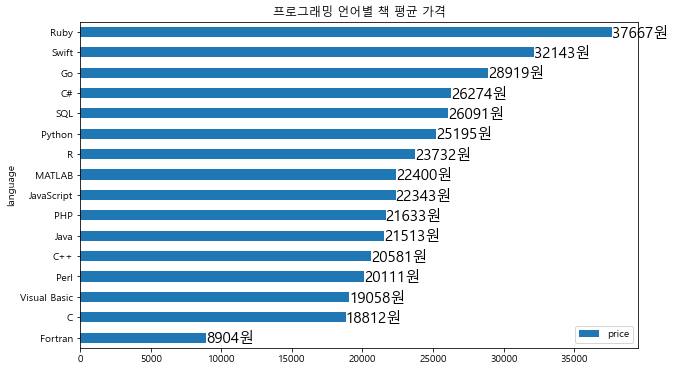

In [22]:
# 프로그래밍 언어별 책 평균 가격 도출
df_gp.sort_values("price", ascending=True, inplace=True)
ax = df_gp.plot(kind="barh", figsize=(10,6), title="프로그래밍 언어별 책 평균 가격");
for p in ax.patches:
    text = str(int(p.get_width())) + "원"
    x = p.get_width()
    y = p.get_y()
    ax.annotate(
        text=text,
        xy = ( x, y ),
        fontsize=15
    )

### 문제  1번 분석
- "프로그래밍 언어별 책 평균 가격" 막대그래프를 보았을 때 2만원대의 서적이 많은 걸 볼 수 있다.
- Ruby, Swift 를 제외하면 수집된 데이터 내에서는 3만원 이내의 평균가를 보여주고 있다.
- 또한 Go, C# 조합과 Python, R 조합과 같이 대조 또는 비슷한 포지션에 위치한 언어들끼리 평균가 오차파 3천원 이내로 관찰된다.

---

# 문제 2번 : 언어별 페이지수도 어떤 특성이 있나요?

- 

In [23]:
df_gp_2 = df_excel.groupby("language").agg(
    page_num = ("page_num", "mean")
)

In [24]:
df_gp_2["page_num"] = round(df_gp_2["page_num"], 0)

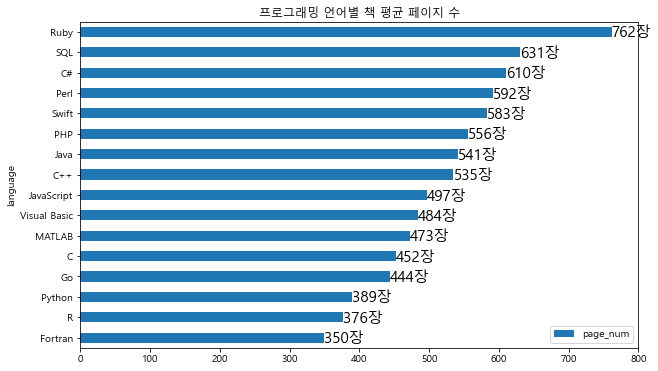

In [25]:
# 프로그래밍 언어별 책 평균 페이지 수
df_gp_2.sort_values("page_num", ascending=True, inplace=True)
ax = df_gp_2.plot(kind="barh", figsize=(10,6), title="프로그래밍 언어별 책 평균 페이지 수");
for p in ax.patches:
    text = str(int(p.get_width())) + "장"
    x = p.get_width()
    y = p.get_y()
    ax.annotate(
        text=text,
        xy = ( x, y ),
        fontsize=15
    )

### 문제  2번 분석
- "프로그래밍 언어별 책 평균 페이지 수" 막대그래프를 보았을 때 350장부터 750장 정도 범위가 골고루 분포 되어 있는 것 같습니다. 
- Ruby는 서적의 평균 판매가도 제일 높았는데 평균 페이지 수 역시 가장 높은 것으로 확인 됩니다.
- 반면에 Python과 R은 서적 평균 판매가는 중간 또는 그 이상에 위치했지만 서적 평균 페이지 수는 하위에 위치해 있습니다.
- 그 외에 대체적으로 평균 판매가가 높은 순서와 비슷하게 서적 평균 페이지 수도 높은 것 같이 보입니다.

---

# 문제 3번 : 페이지 수와 가격 사이에는 어떤 특성이 있나요?

In [43]:
df_buble = pd.concat([df_gp, df_gp_2], axis=1)

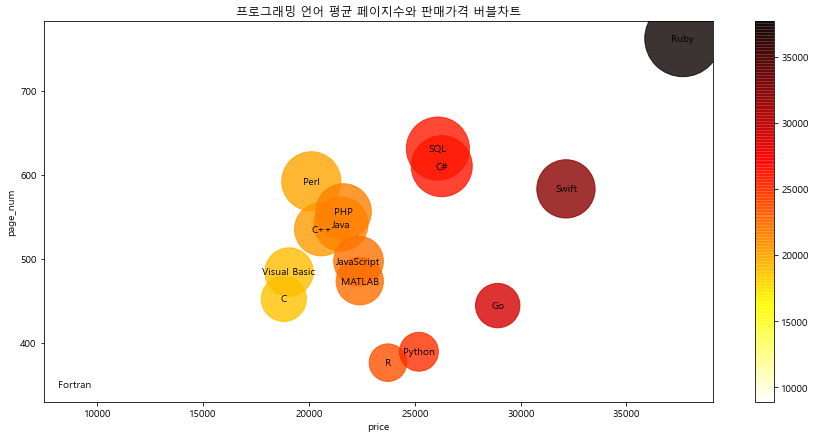

In [44]:
 # scatter()를 이용한 원 생성
ax = df_buble.plot.scatter(
    title="프로그래밍 언어 평균 페이지수와 판매가격 버블차트",
    x="price",
    y="page_num",
    s=df_buble["page_num"]*df_buble["page_num"]/100,
    c=df_buble["price"],
    colormap='hot_r', # colormap = "viridis",
    alpha = 0.8,
    sharex = False,
    figsize = (15,7)
)

# 프로그래밍 언어 표기
for idx, lang in enumerate(df_buble.index):
    ax.annotate(
        lang, 
        (df_buble.price.iat[idx], df_buble.page_num.iat[idx]),
        ha = "center", # 수평 정렬
        va = "center", # 수직 정렬
    )

# 시각화
plt.show()

### 문제  3번 분석
- R, Python, Go 정도를 제외하고 나머지 프로그래밍 언어의 서적들은 대부분 인쇄 페이지 수가 많아질 수록 평균 판매가가 높아지는 것으로 관측 됩니다.
- R, Python, Go 언어 같은 경우, 최근 교육 매체 또는 현업 등에서 많이 활용하기 시작하면서 분량이 많지는 않지만 중급, 고급 내용을 담아서 페이지 수에비해 평균 가격대가 높아진 것으로 예상 됩니다.
- Ruby 같은 경우 평균 페이지수도 많고, 평균 판매가도 가장 높기 때문에 입문자가 처음 접근해서 학습하기 난이도가 있을 것으로 예상 됩니다.